# HOUSING PROJECT

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

# Loading Train Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [4]:
df.shape

(1168, 81)

We have 1168 rows and 81 columns in the train data set

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Checking Null/Missing Values

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
null=pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['null_values']
null

null_values
LotFrontage           214
Alley                1091
MasVnrType              7
MasVnrArea              7
BsmtQual               30
BsmtCond               30
BsmtExposure           31
BsmtFinType1           30
BsmtFinType2           31
FireplaceQu           551
GarageType             64
GarageYrBlt            64
GarageFinish           64
GarageQual             64
GarageCond             64
PoolQC               1161
Fence                 931
MiscFeature          1124

<AxesSubplot:>

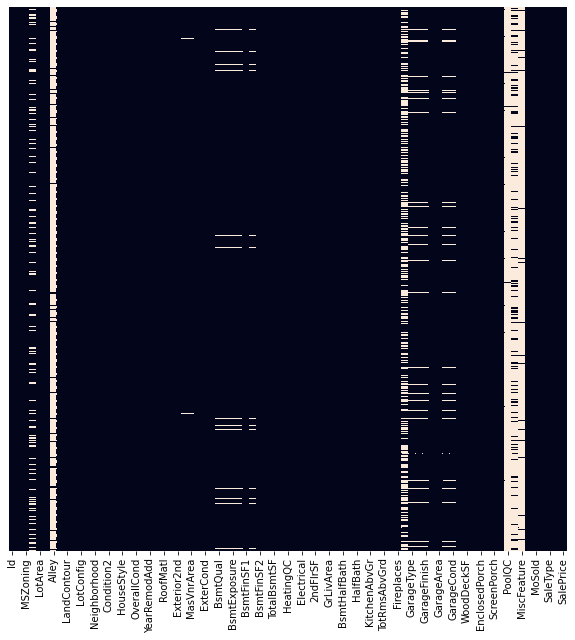

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Observations :-

LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature have null values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Filling Missing Values in Continuous Columns with mean


In [11]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [12]:
df.drop(['Alley'],axis=1,inplace=True)

Filling Missing Values in Categorical Features with mode

In [13]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [14]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [15]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [16]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [17]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [18]:
df.shape

(1168, 76)

In [19]:
df.drop(['Id'],axis=1,inplace=True)

In [20]:
null=pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['null_values']
null

null_values
MasVnrType              7
MasVnrArea              7
BsmtExposure           31
BsmtFinType1           30
BsmtFinType2           31

In [21]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

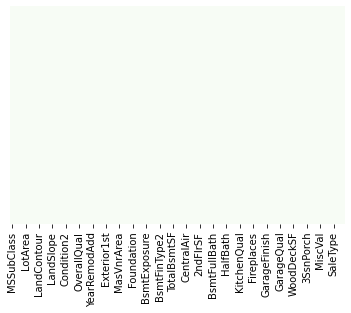

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Greens')
plt.show()

# STATISTICAL SUMMARY

In [23]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295     1.776541   
std        0.817229      0.216292      1.598484     0.650575     0.745554   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    476.860445    96.206336    46.559932      23.015411     3.639555   
std     214.466769   126.158988    66.381023      63.191089    29.088867   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     338.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   171.000000    70.000000       0.000000 

Observations :-

Mean is more than median for SalePrice, MoSold, MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, OpenPorchSF, WoodDeckSF, BsmtFinSF1, MasVnrArea, YearRemodAdd, OverallCond, OverallQual, LotArea, LotFrontage, MSSubClass and Id Column.

There is large difference between 75% and maximum for Price column.

# Finding Correlation

In [40]:
dfcorr=df.corr()
dfcorr

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336681 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069661 -0.023328  0.140215   
LotFrontage     -0.336681 -0.069661     1.000000  0.299452 -0.035309   
LotArea         -0.124151 -0.023328     0.299452  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035309 -0.263973  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.016015 -0.051646     0.022517  0.015141 -0.008860   
YrSold          -0.038595 -0.004964    -0.003885 -0.035399 -0.019635   
SaleType         0.035050  0.079854    -0.035356  0.005421  0.025920   
SaleCondition   -0.028981  0.004501     0.065091  0.034236  0.014176   
SalePrice       -0.060775 -0.133221     0.323779  0.249499  0.044753   

               LotShape  LandContour  LotConfig  LandSlope  Neighborhood  \
MSSubClass     0.104485    -0.021387   0.076880  -0.014930      0.013918   
MSZoning       0.053655     0.001175  -0.027246  -0.023952     -0.251833   
LotFrontage   -0.144523    -0.073451  -0.192468   0.046051      0.065824   
LotArea       -0.189201    -0.159038  -0.152063   0.395410      0.010707   
Street        -0.012941     0.105226   0.000153  -0.141572      0.001420   
...                 ...          ...        ...        ...           ...   
MoSold        -0.050418    -0.023872   0.019084   0.030526      0.023378   
YrSold         0.021421     0.009499  -0.009817  -0.005352      0.026181   
SaleType      -0.015161    -0.041763  -0.002039   0.056004     -0.023081   
SaleCondition -0.054905     0.047715   0.043692  -0.061461      0.042340   
SalePrice     -0.248171     0.032836  -0.060452   0.015485      0.198942   

               Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
MSSubClass      -0.042474   -0.044319  0.731815    0.381585     0.070462   
MSZoning        -0.025651    0.031959 -0.024776   -0.110991    -0.134037   
LotFrontage     -0.025581    0.011761 -0.403220    0.056321     0.229218   
LotArea          0.029520    0.040096 -0.215345   -0.040637     0.107188   
Street           0.002189    0.001406 -0.013606    0.016793     0.057140   
...                   ...         ...       ...         ...          ...   
MoSold           0.001801    0.013511 -0.015765    0.030316     0.090638   
YrSold          -0.004127   -0.029983 -0.011168   -0.006124    -0.048759   
SaleType        -0.007101    0.001565 -0.020145    0.056643    -0.049794   
SaleCondition    0.059027    0.054288 -0.000308    0.024668     0.212932   
SalePrice        0.105820    0.033956 -0.066028    0.205502     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
MSSubClass       -0.056978   0.023988      0.056618  -0.100641 -0.032214   
MSZoning          0.189553  -0.299732     -0.174586   0.000913  0.009719   
LotFrontage      -0.047573   0.112655      0.088799   0.146222  0.082566   
LotArea           0.017513   0.005506      0.027228   0.038615  0.194142   
Street            0.031082   0.020292      0.057866  -0.006875  0.007889   
...                    ...        ...           ...        ...       ...   
MoSold            0.005519   0.031754      0.024663   0.014650  0.026417   
YrSold            0.055517  -0.013976      0.033265   0.028443 -0.033365   
SaleType          0.102515  -0.062720      0.020832  -0.045064  0.013136   
SaleCondition     0.023908   0.212597      0.227400   0.064453 -0.054714   
SalePrice        -0.065642   0.514408      0.507831   0.192654  0.159865   

               Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
MSSubClass       -0.090178    -0.120022   -0.013252    0.028215  -0.024133   
MSZoning         -0.012037     0.005548   -0.033521   -0.059170   0.184815   
LotFrontage       0.087727     0.110762   -0.034388    0.188108  -0.169835   
LotArea           0.048265     0.027328   -0.005204    0.120192  -0.057865   
Street            0.0

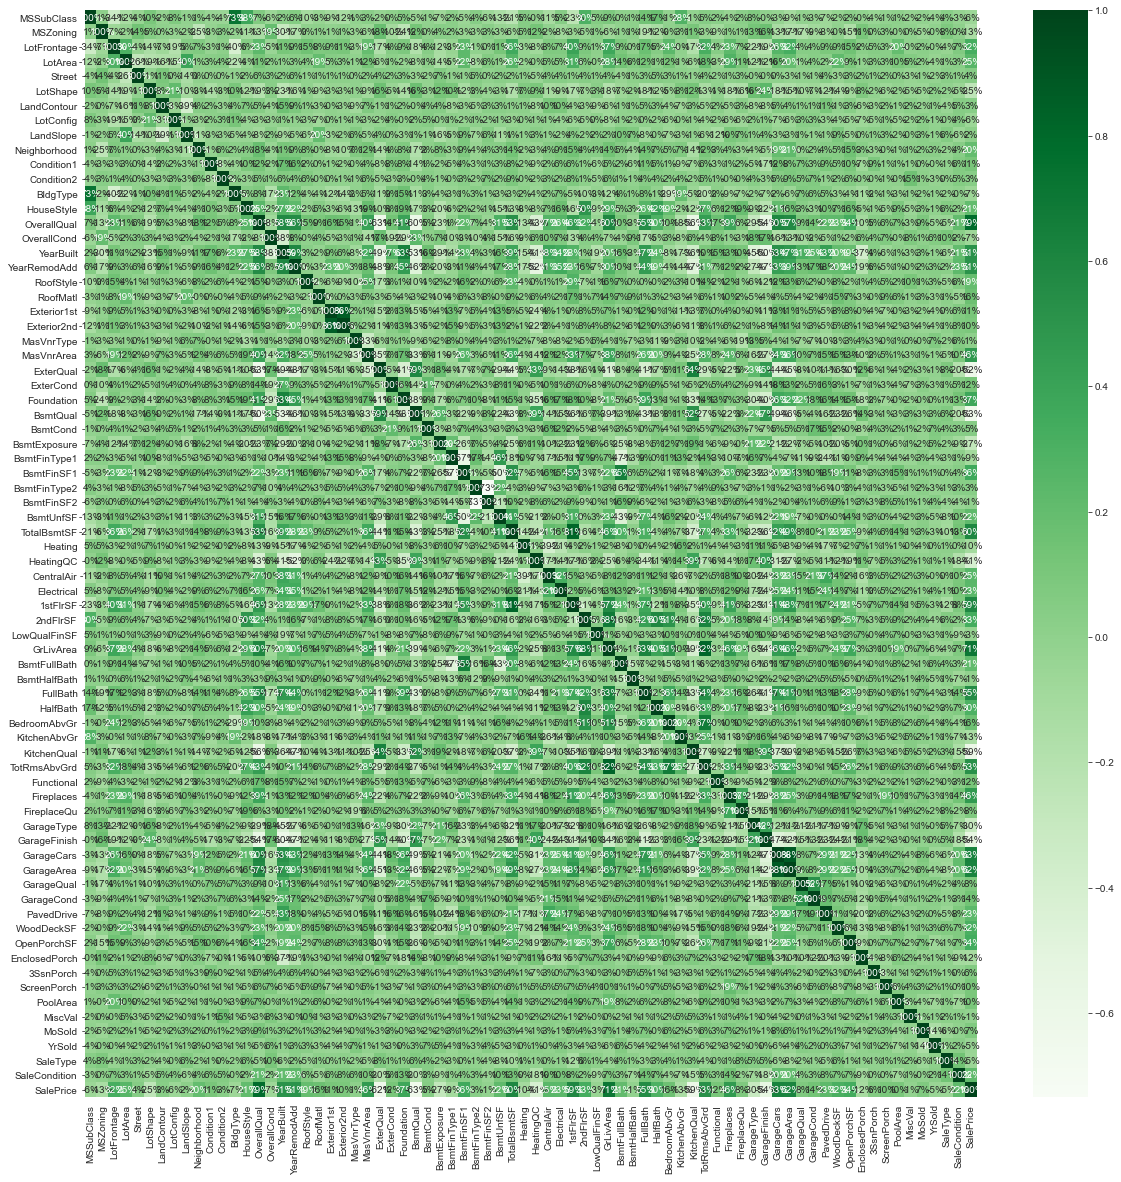

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcorr,annot=True,fmt='.0%',cmap='Greens')
plt.show()

SalesPrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

As there is multicollinearity found in between columns so we will use Pricipal Component Analysis.

# Exploring Target Variable

In [25]:
df['SalePrice'].value_counts()

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

As there is a continuos values in SalePrice so this is a REGRESSION Problem.

Skew is: 1.953877705368286


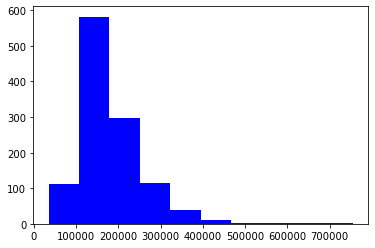

In [26]:
print ("Skew is:", df.SalePrice.skew())
plt.hist(df.SalePrice, color='blue')
plt.show()

<AxesSubplot:xlabel='SalePrice'>

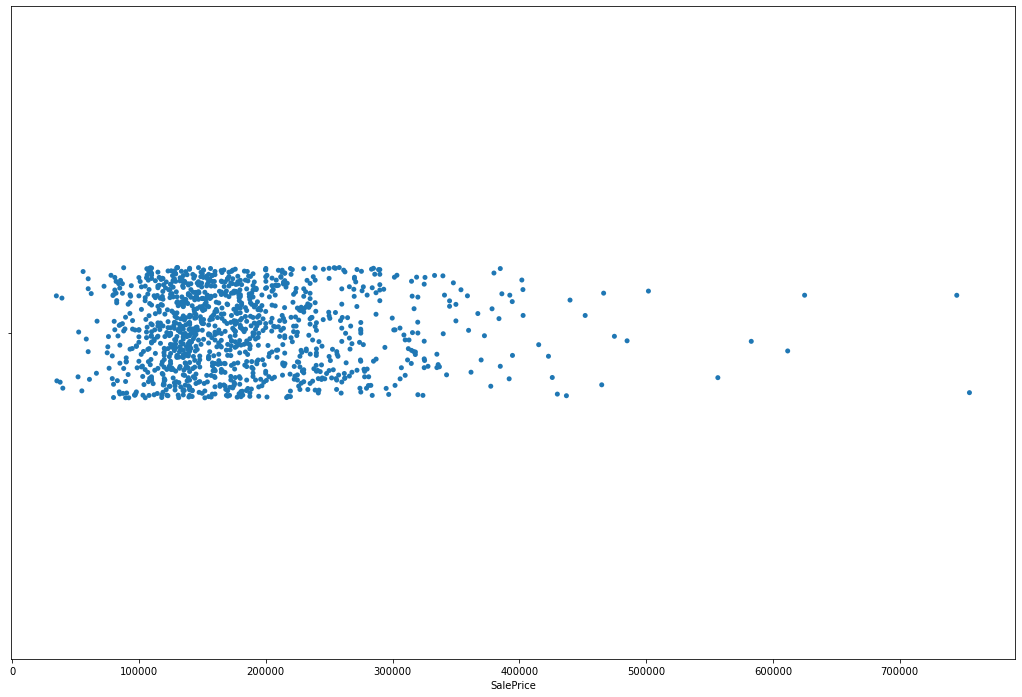

In [27]:
plt.figure(figsize=(18,12))
sns.stripplot(df['SalePrice'])

Majorly Sales Price are between 100000 and 200000.

# Bivariate Analysis

In [28]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

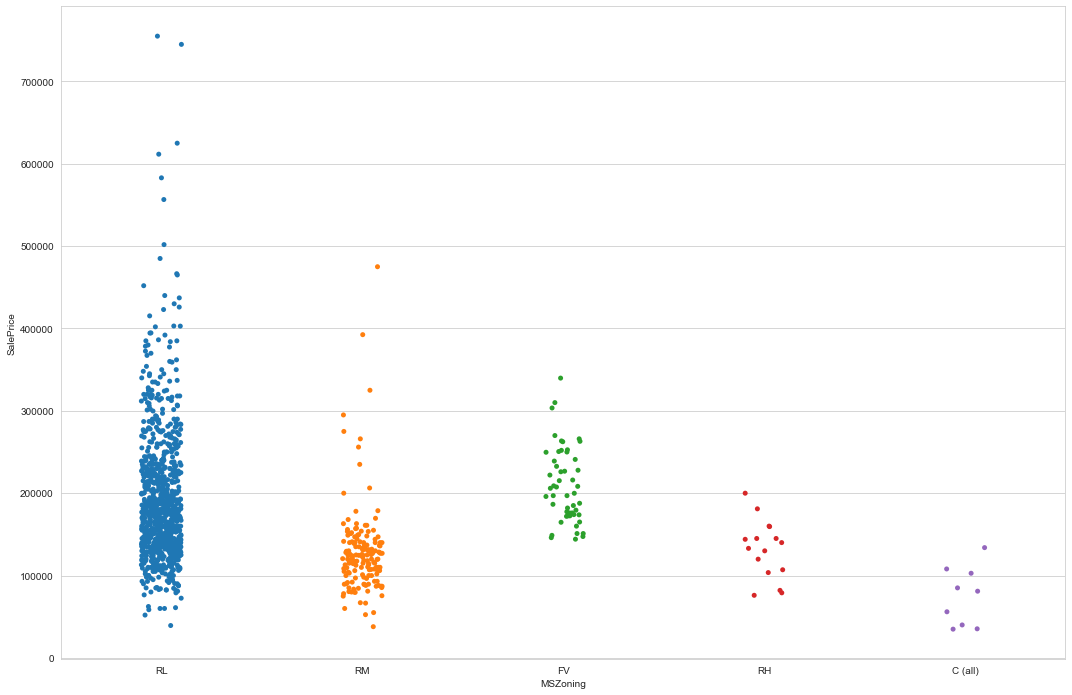

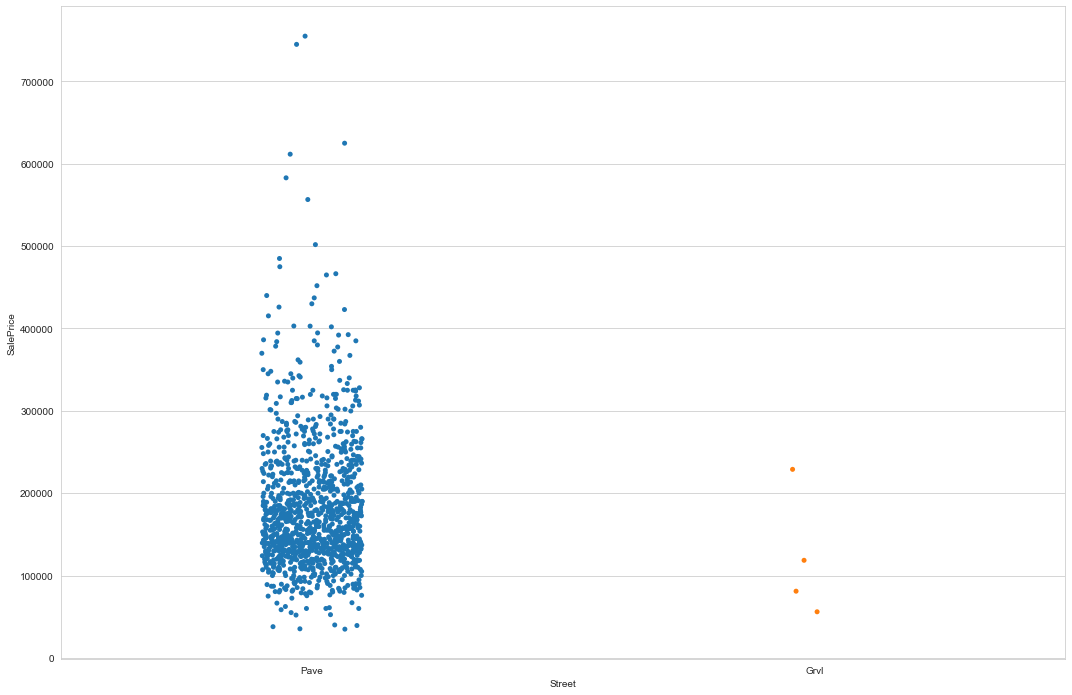

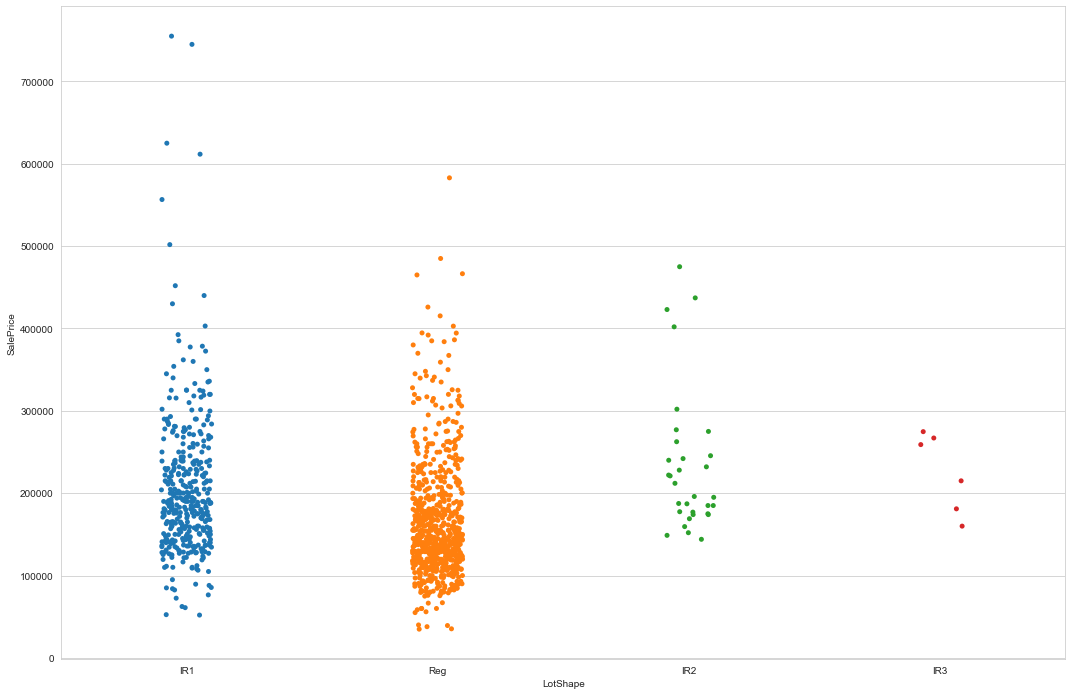

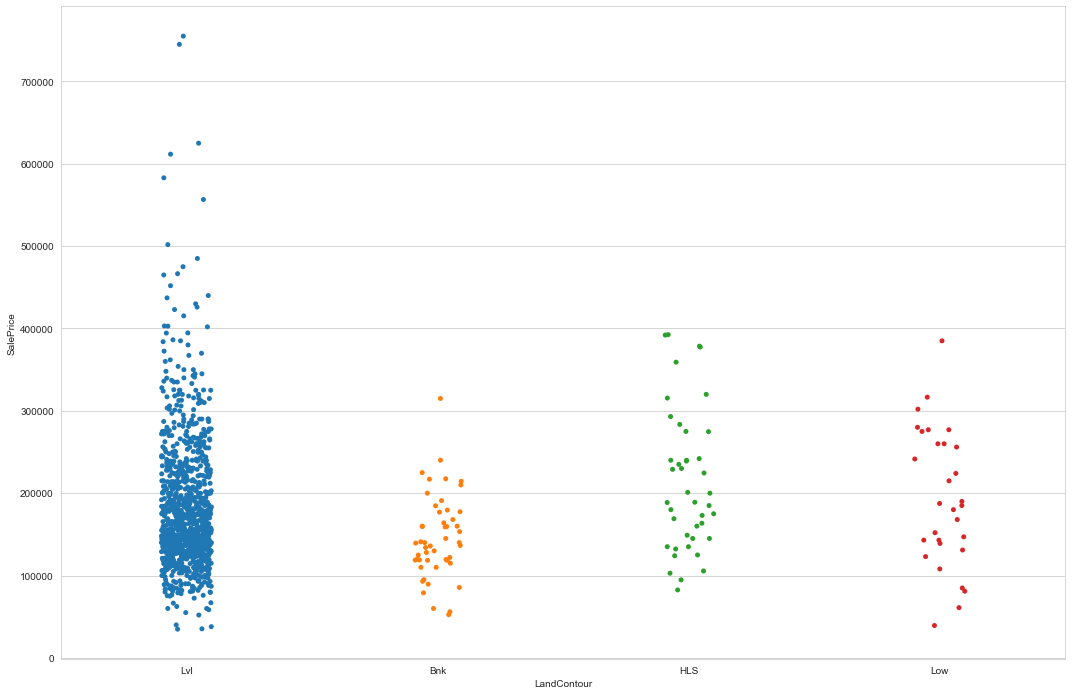

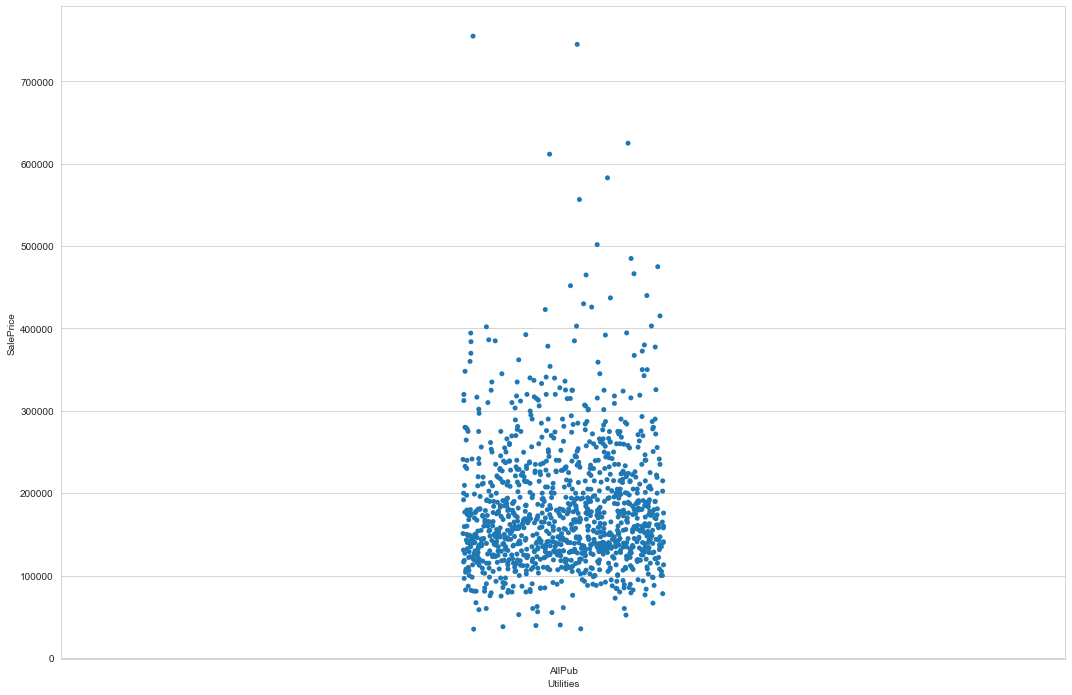

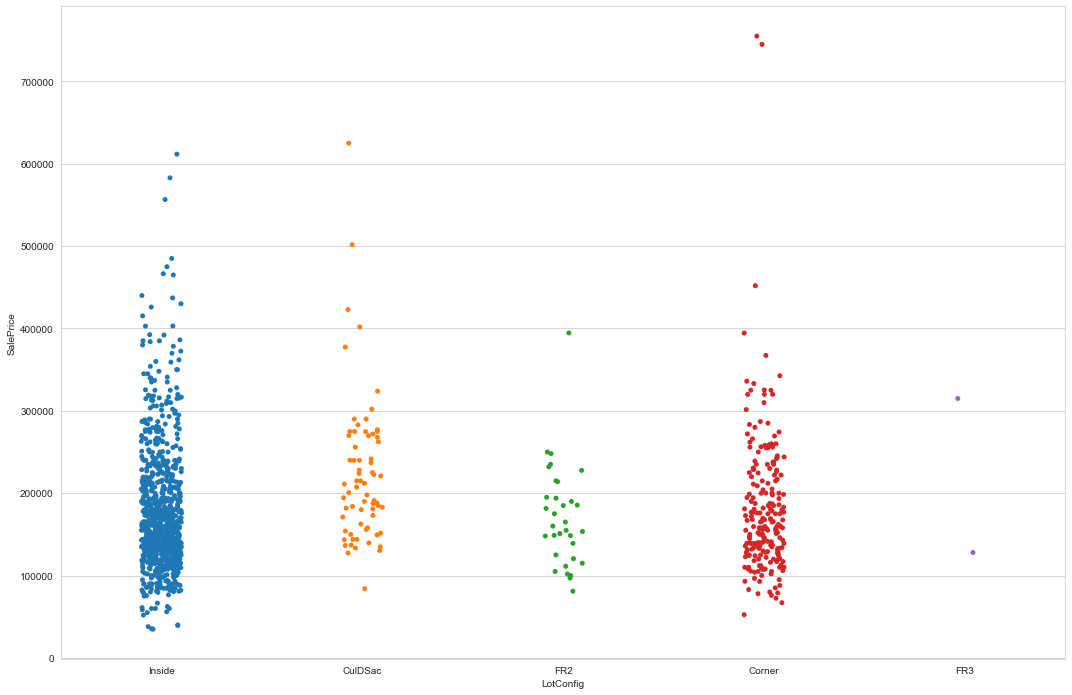

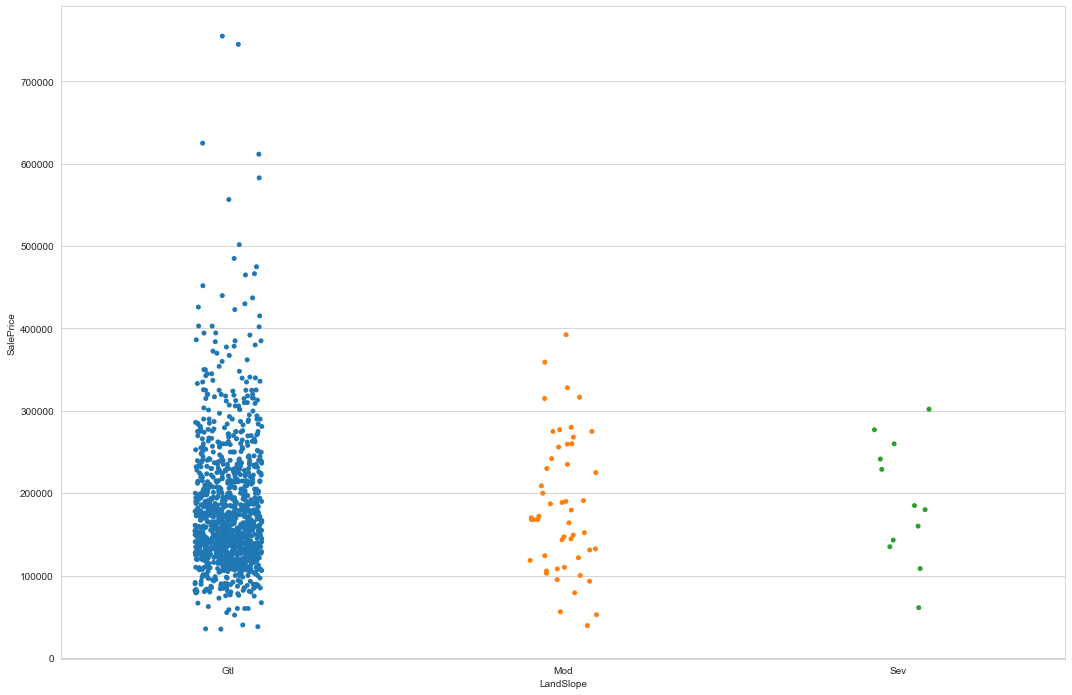

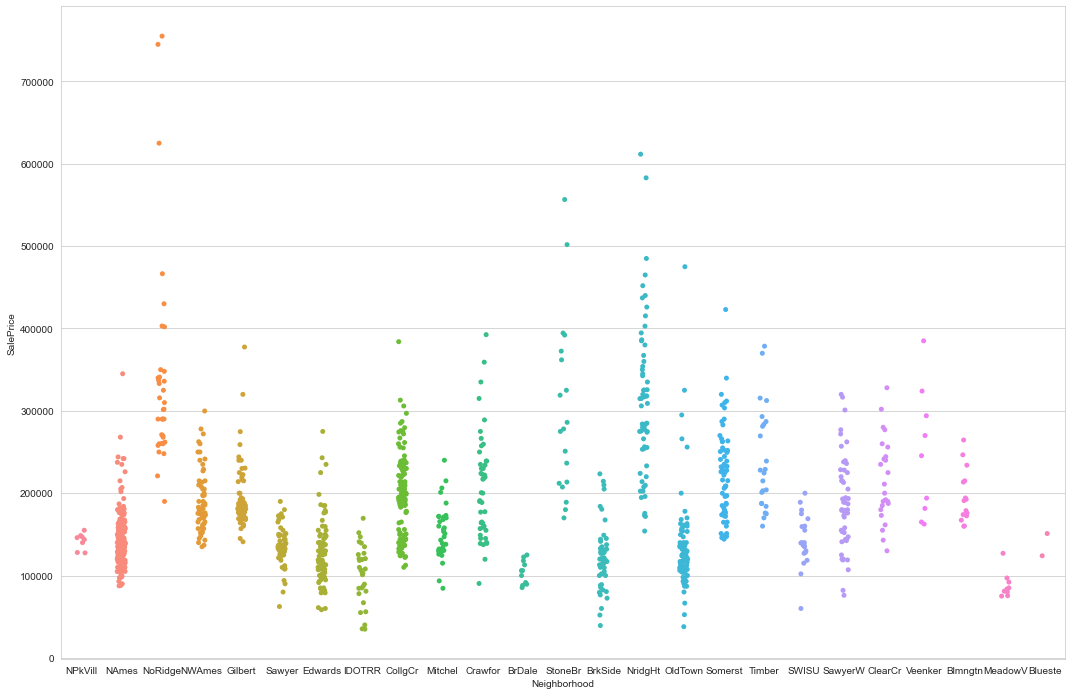

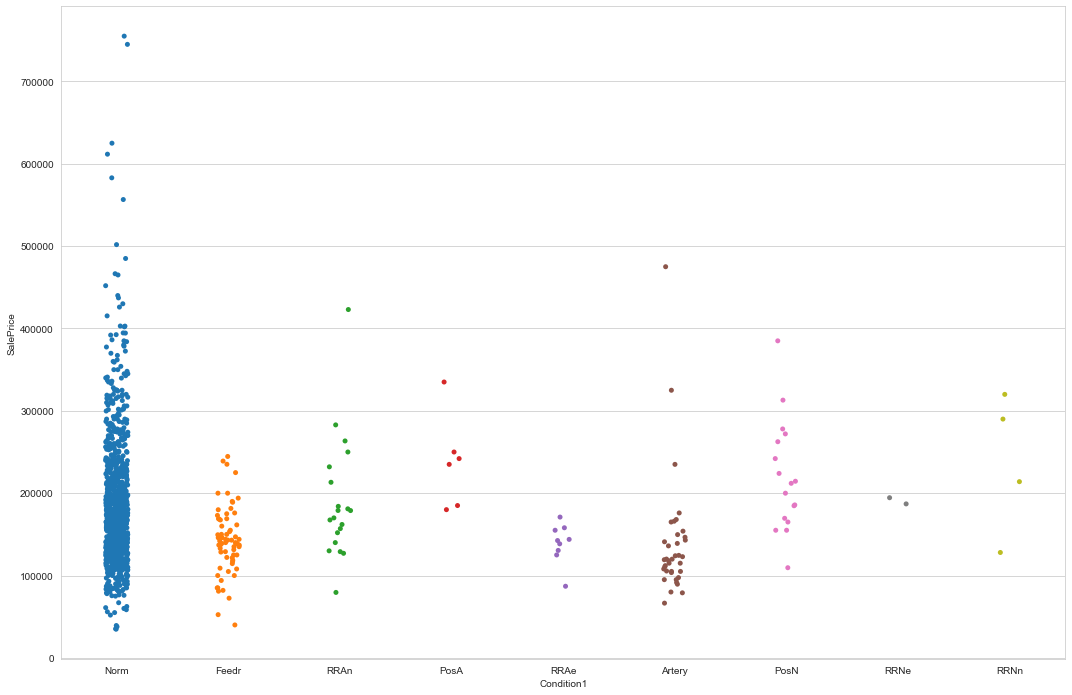

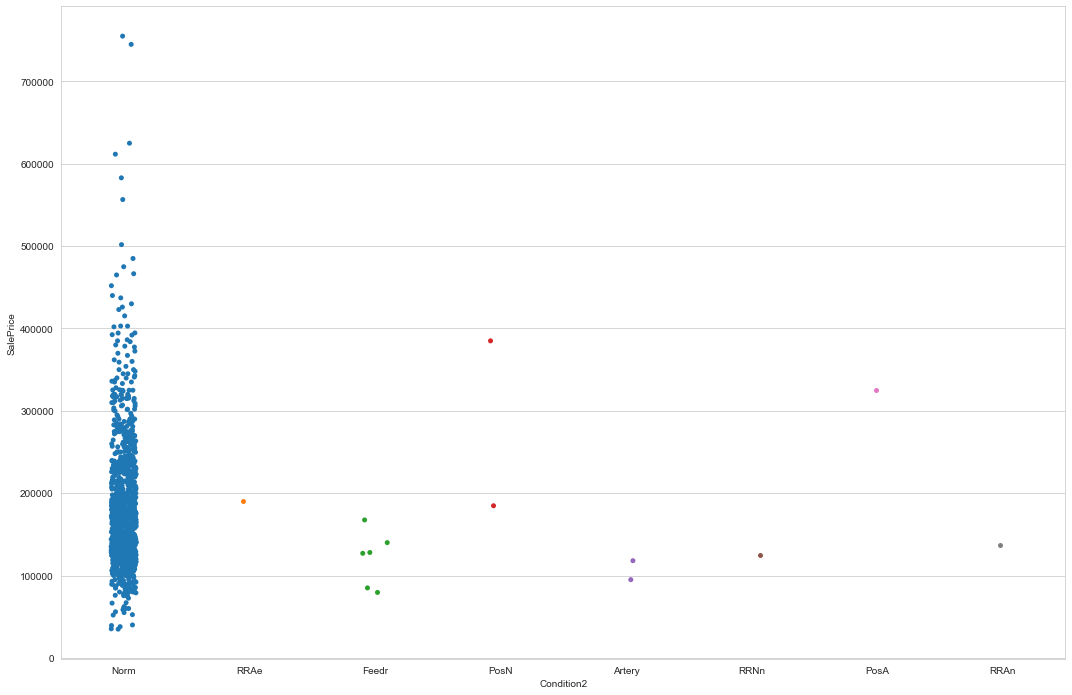

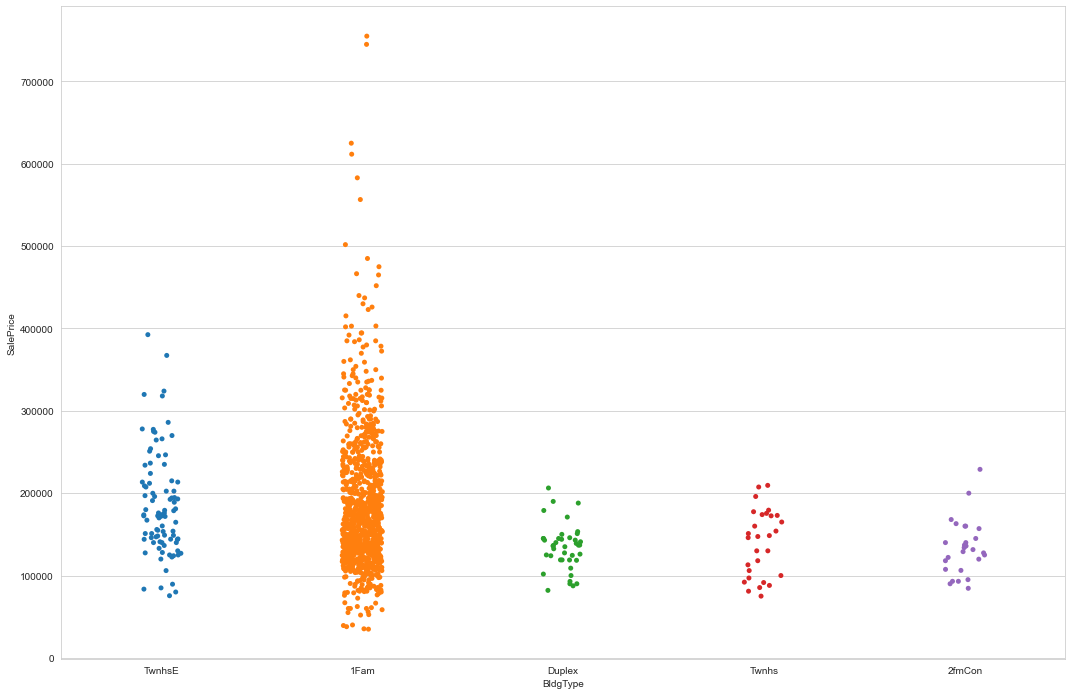

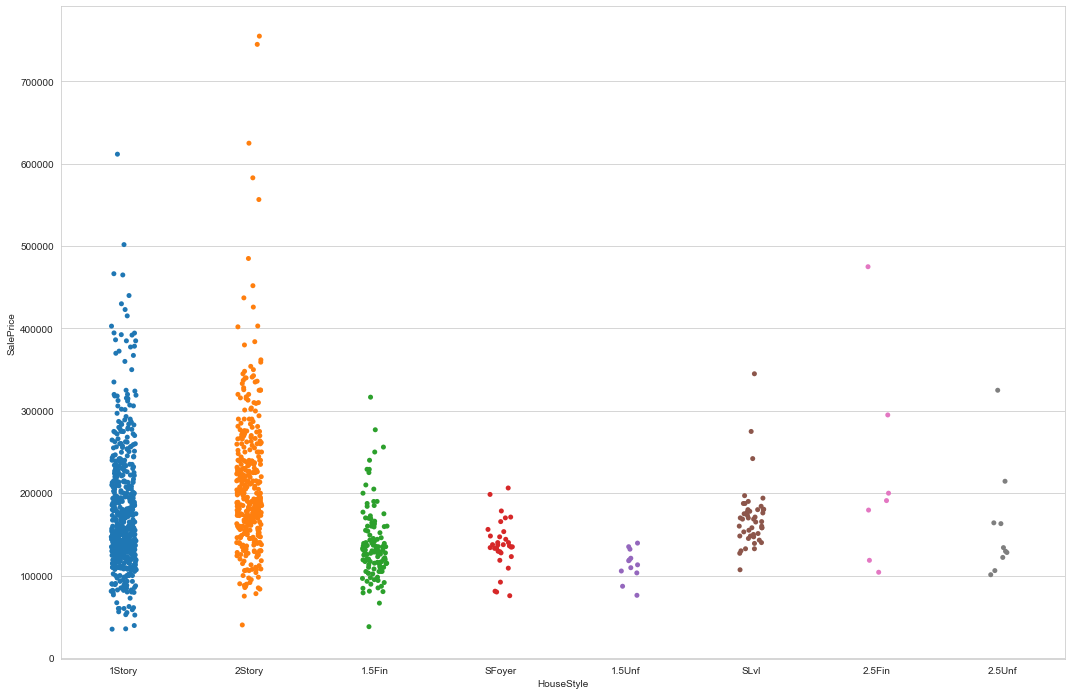

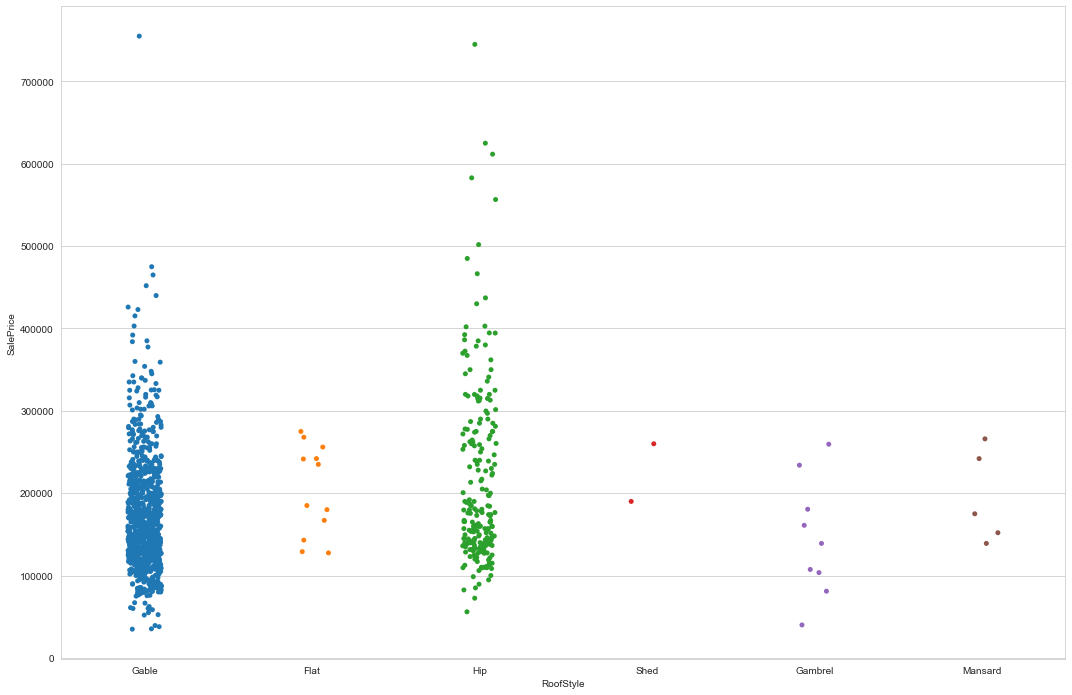

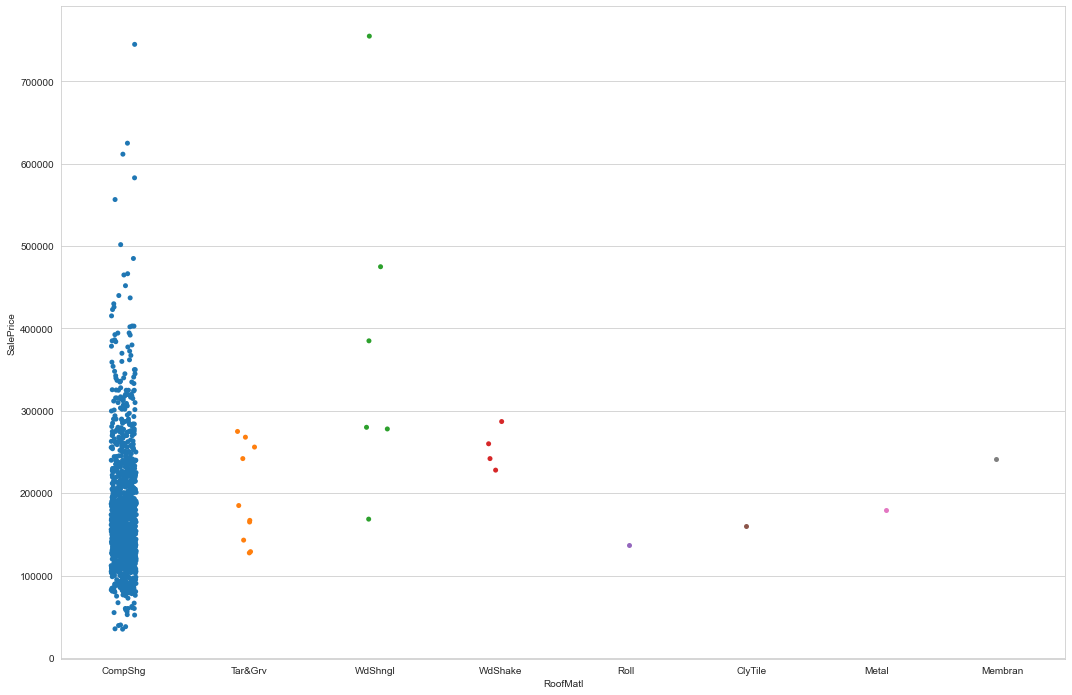

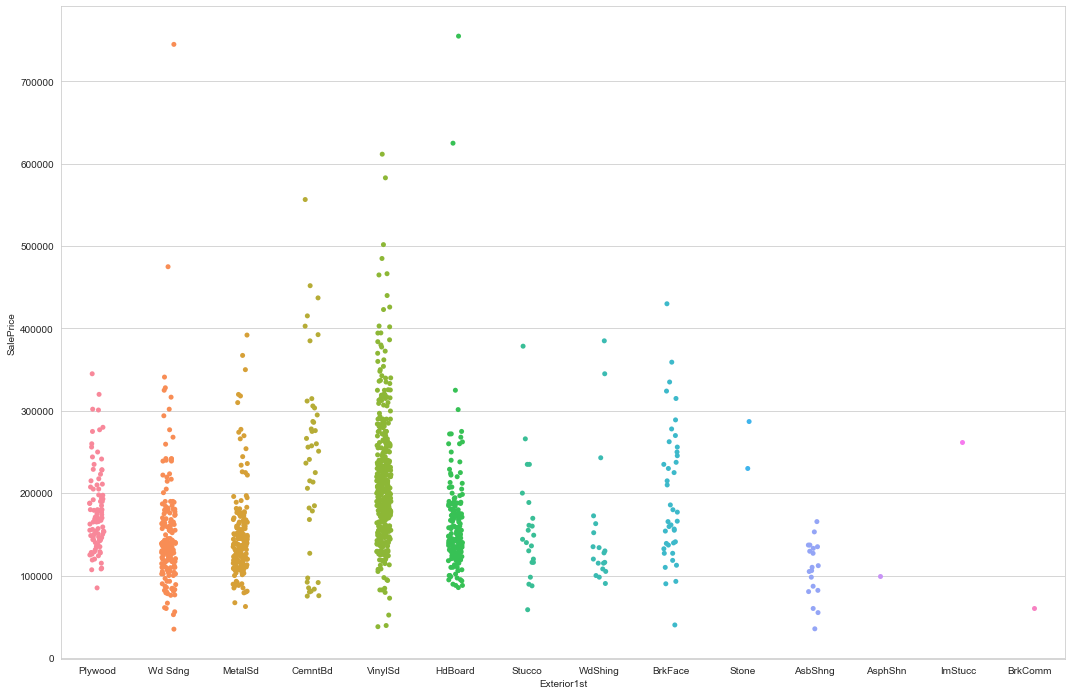

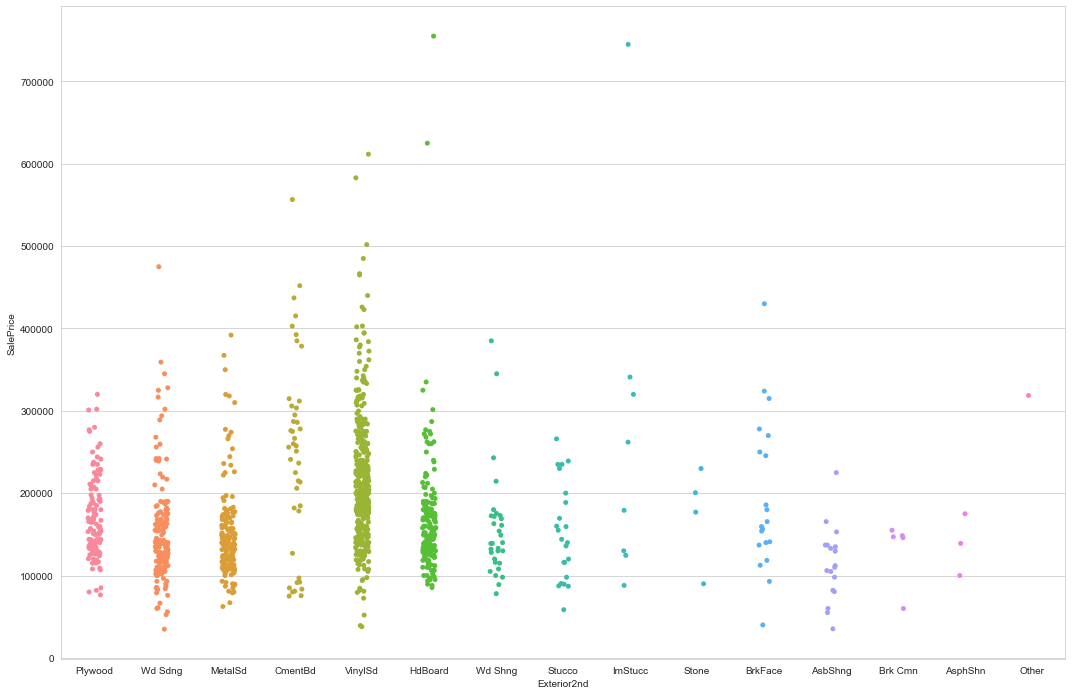

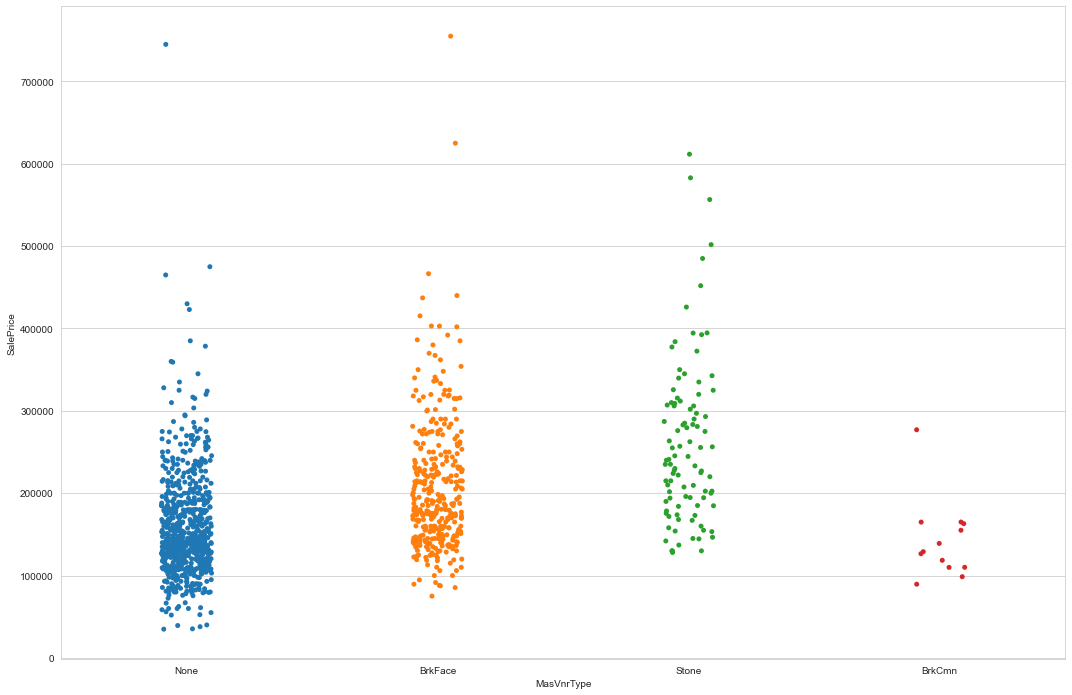

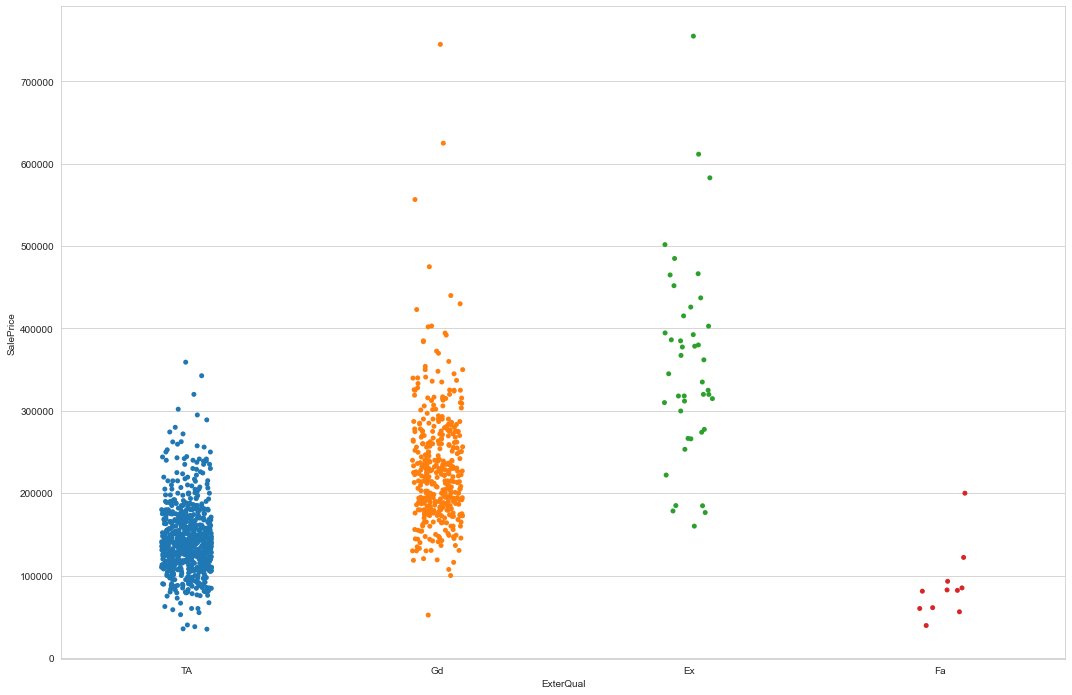

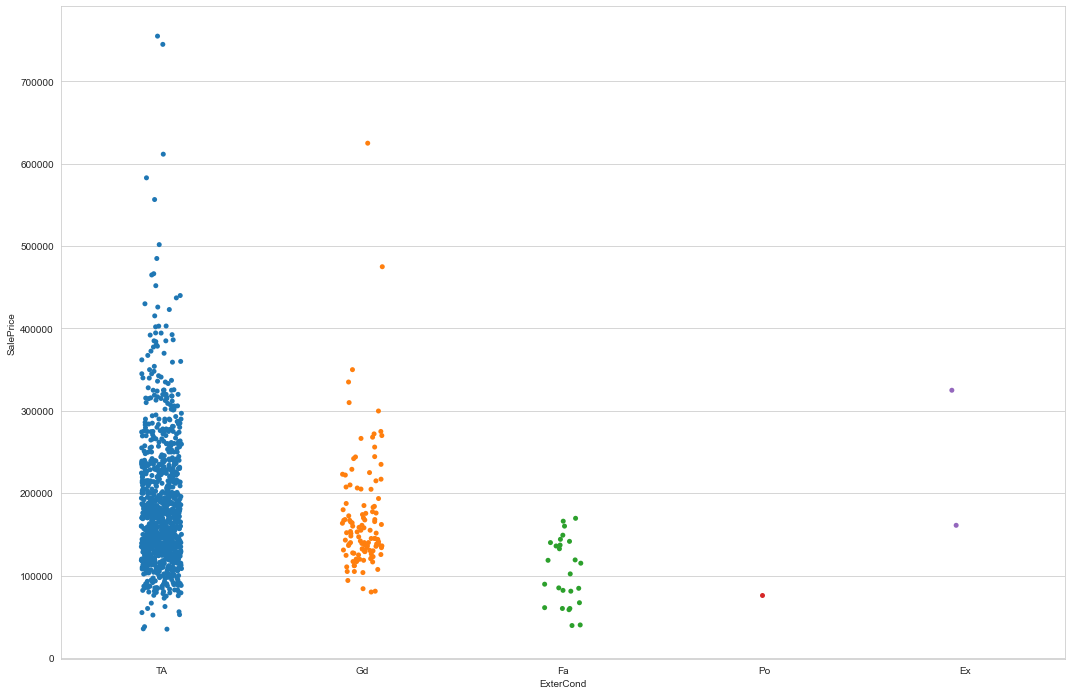

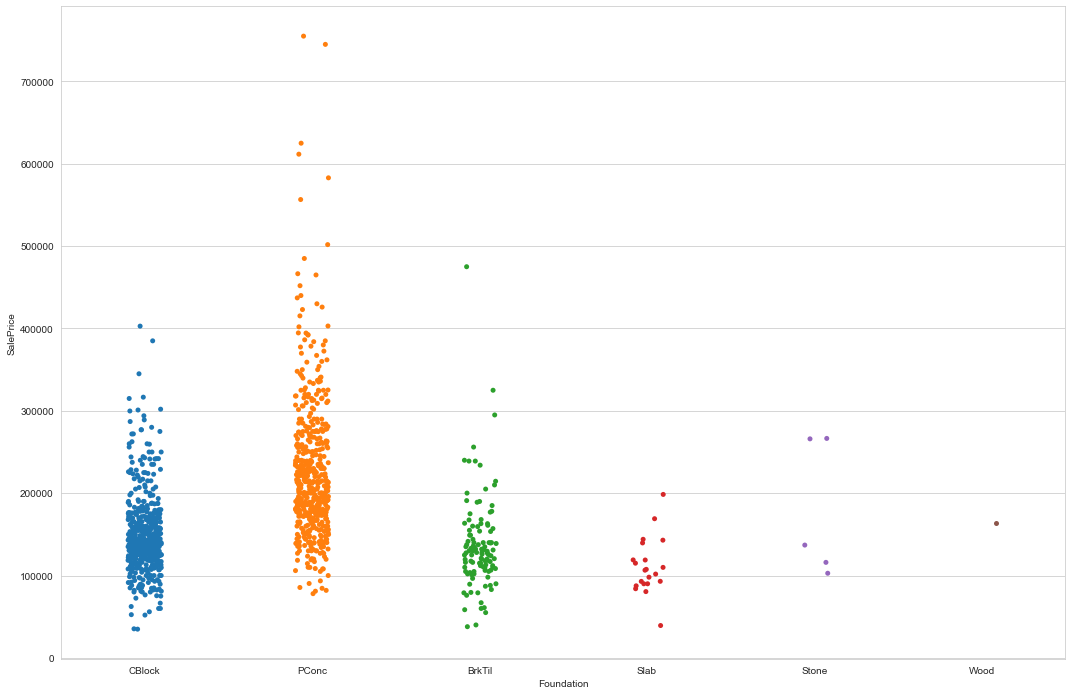

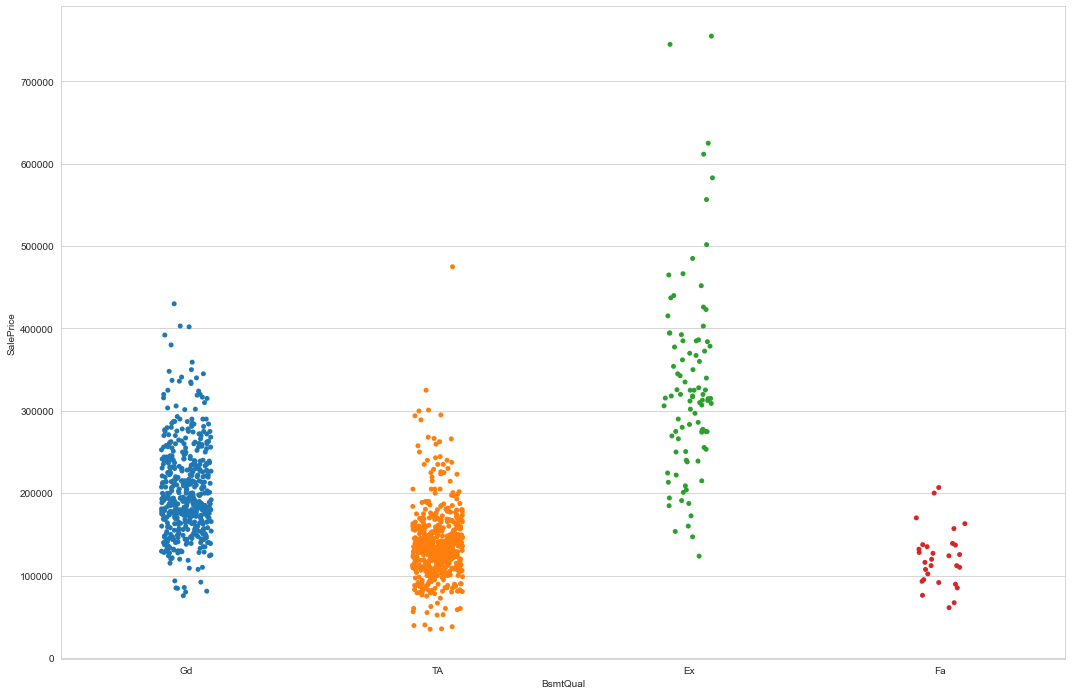

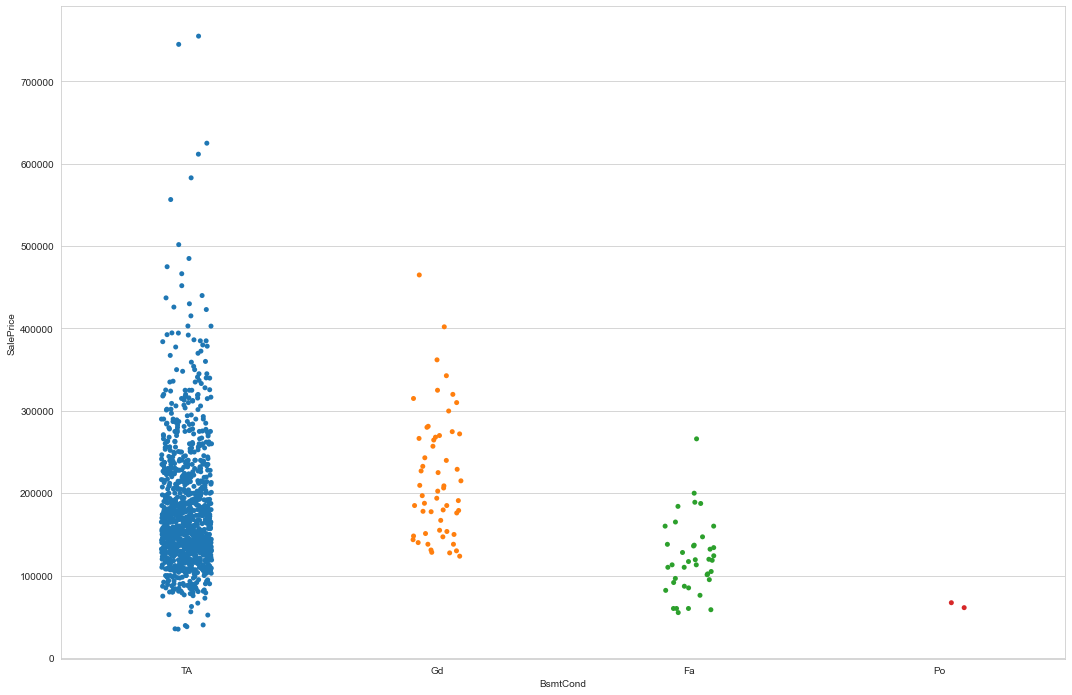

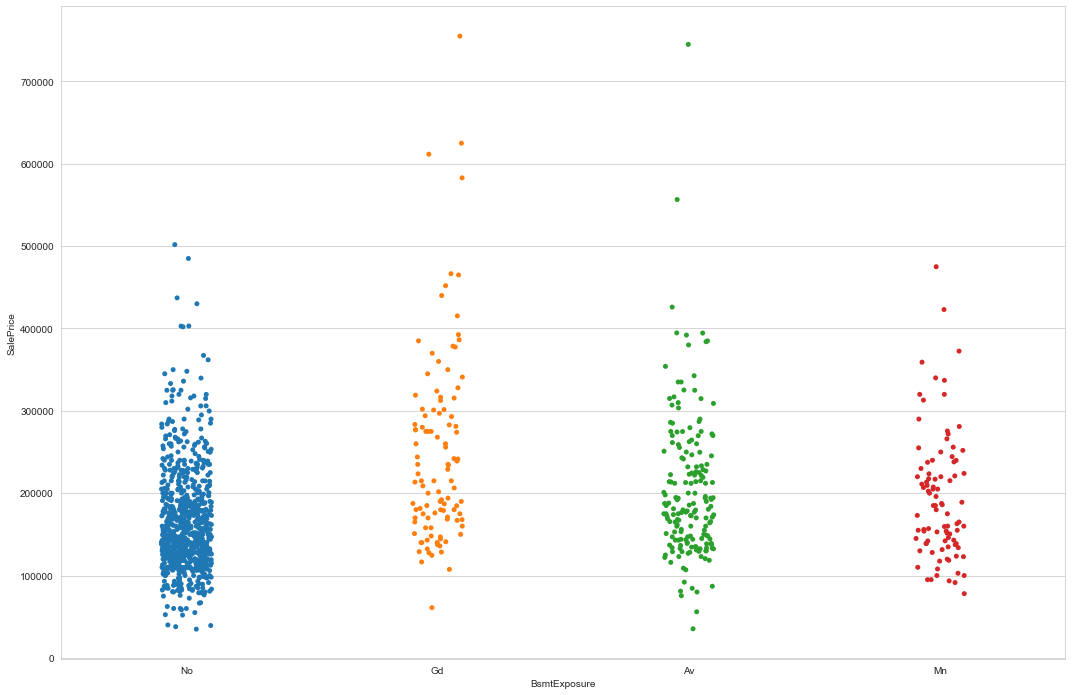

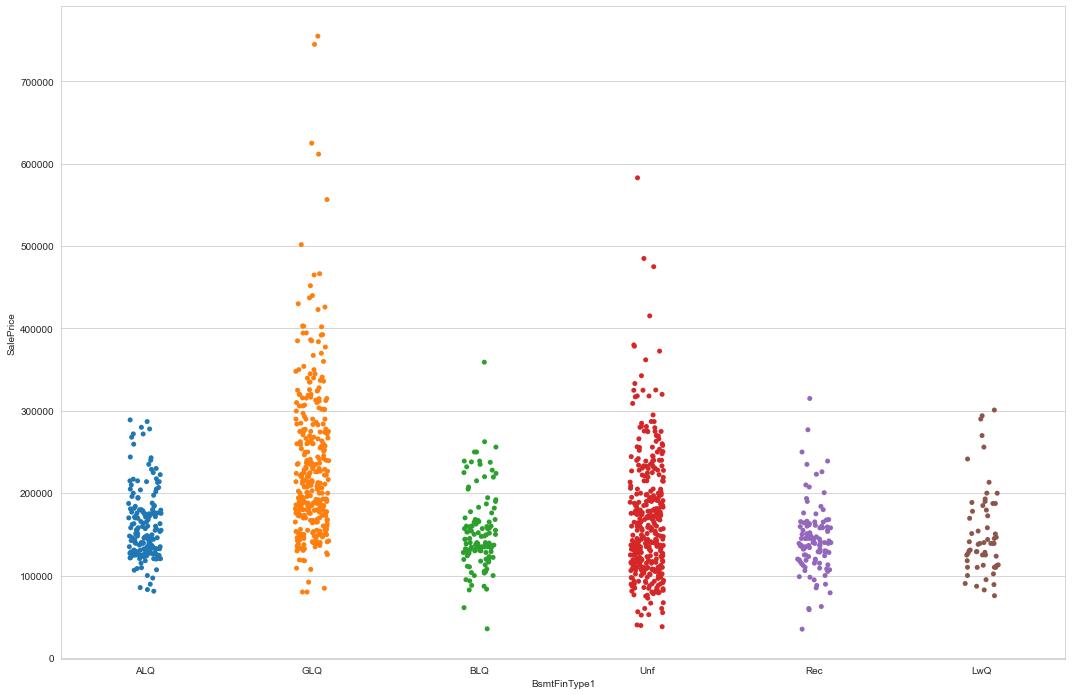

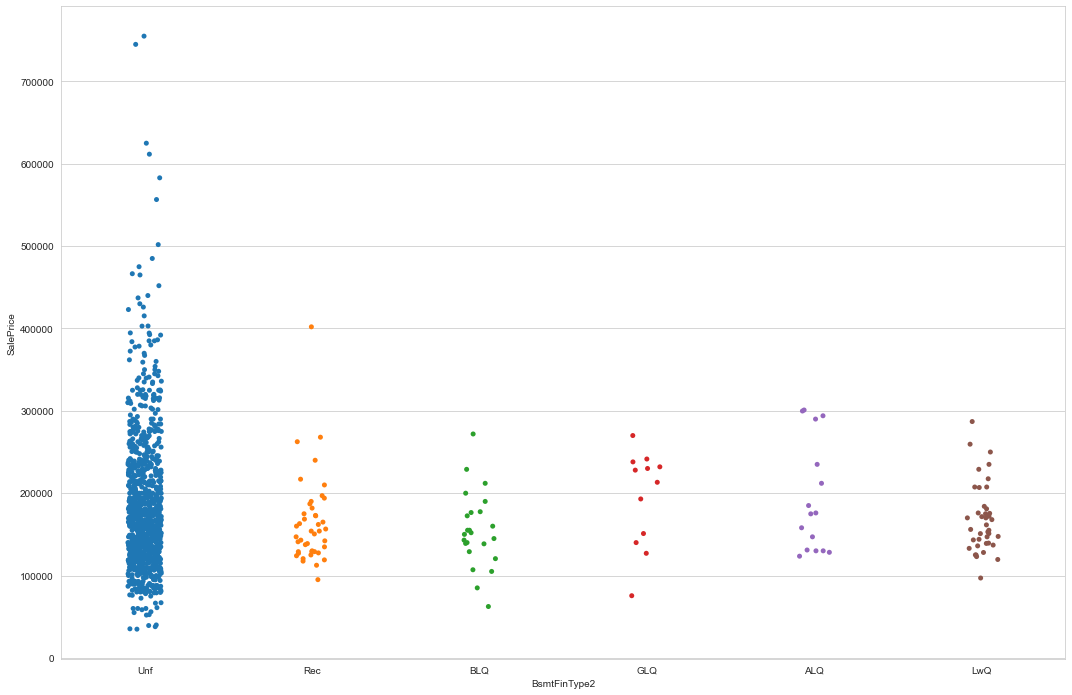

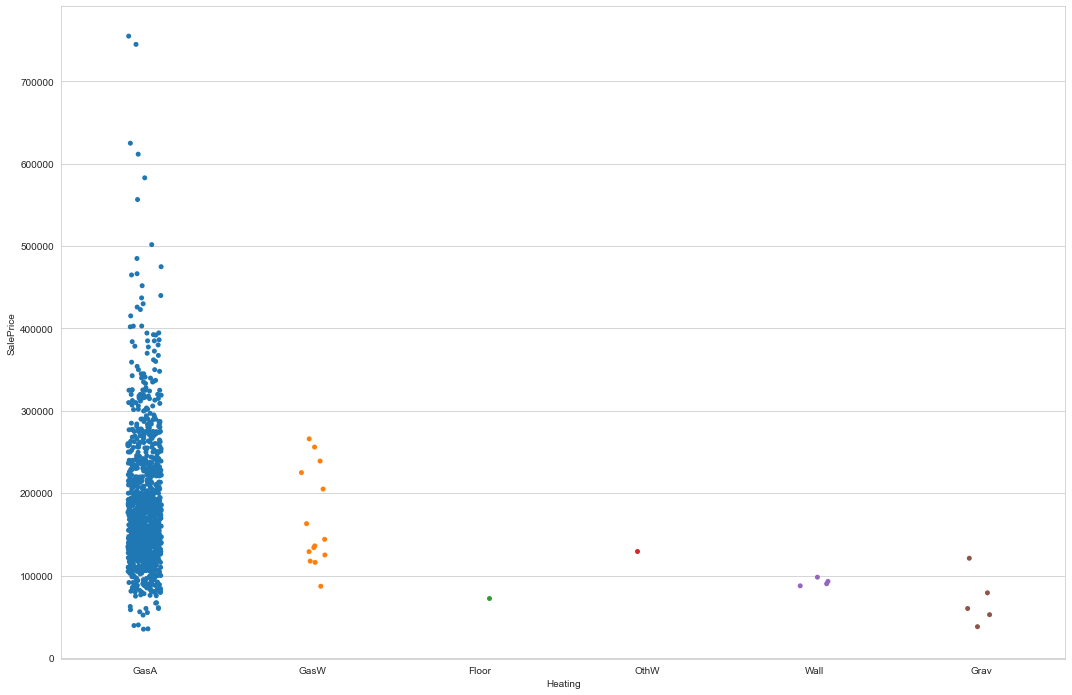

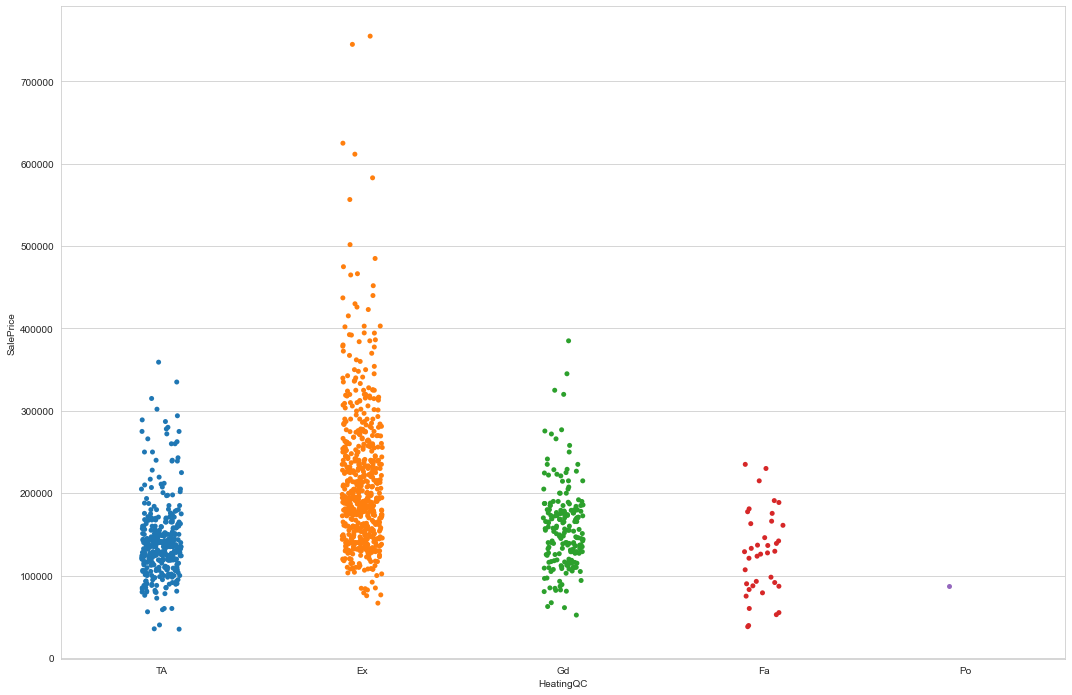

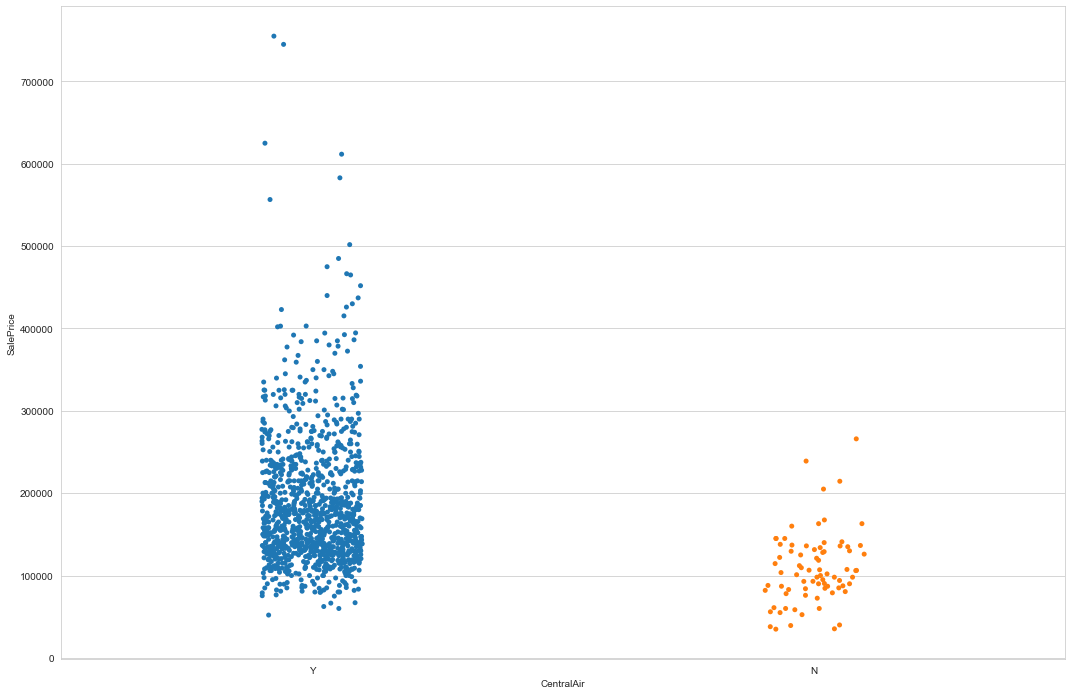

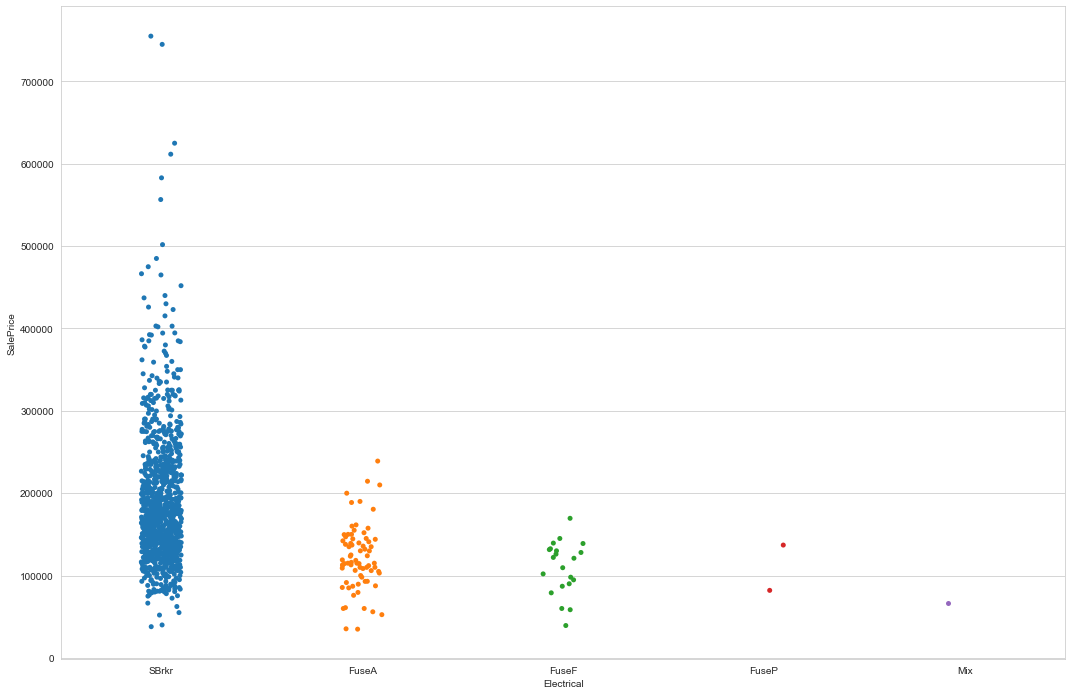

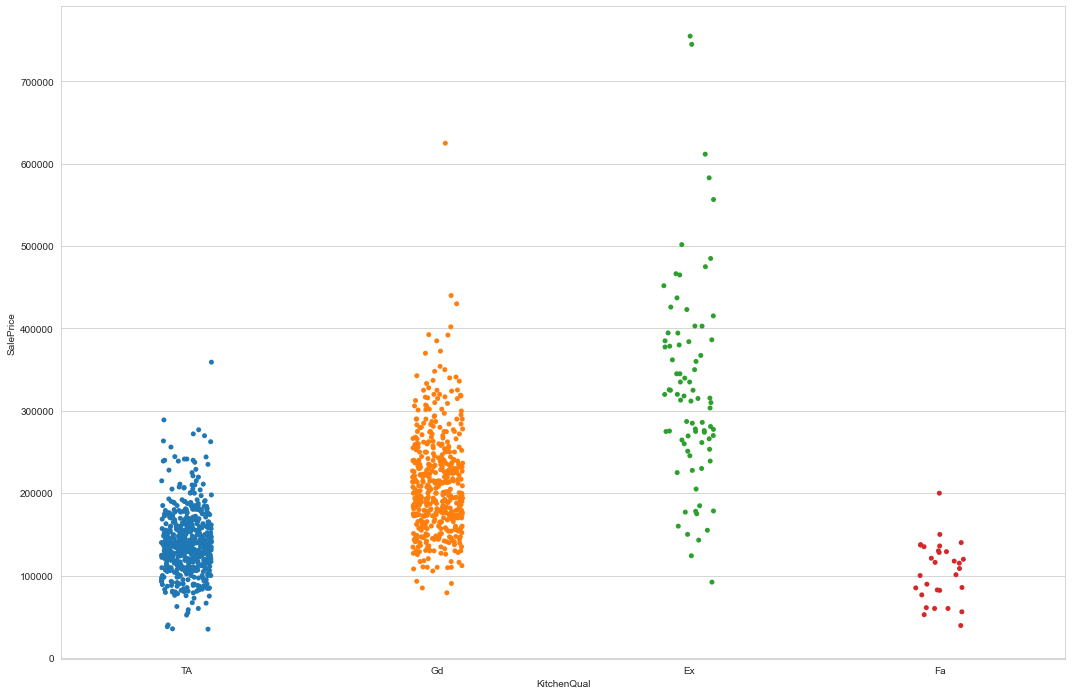

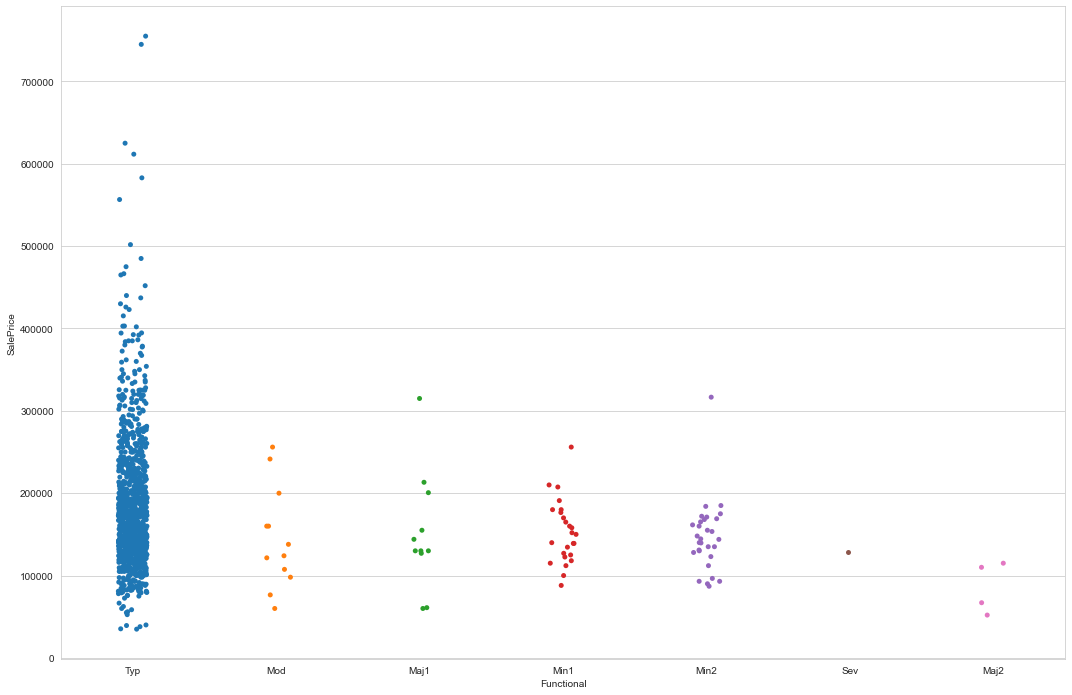

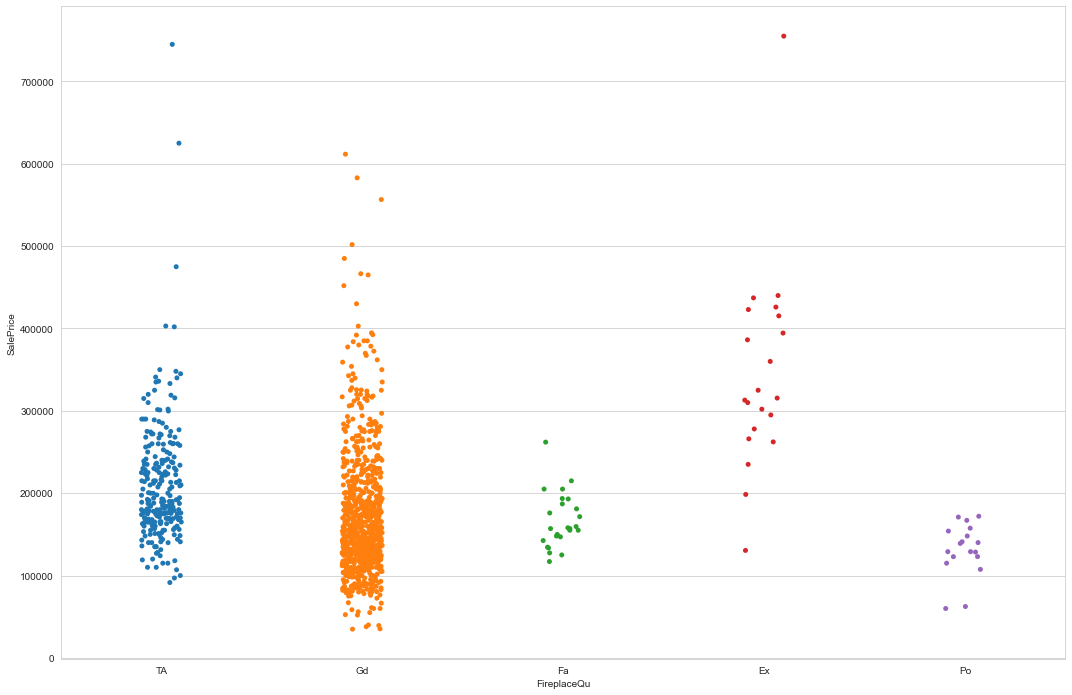

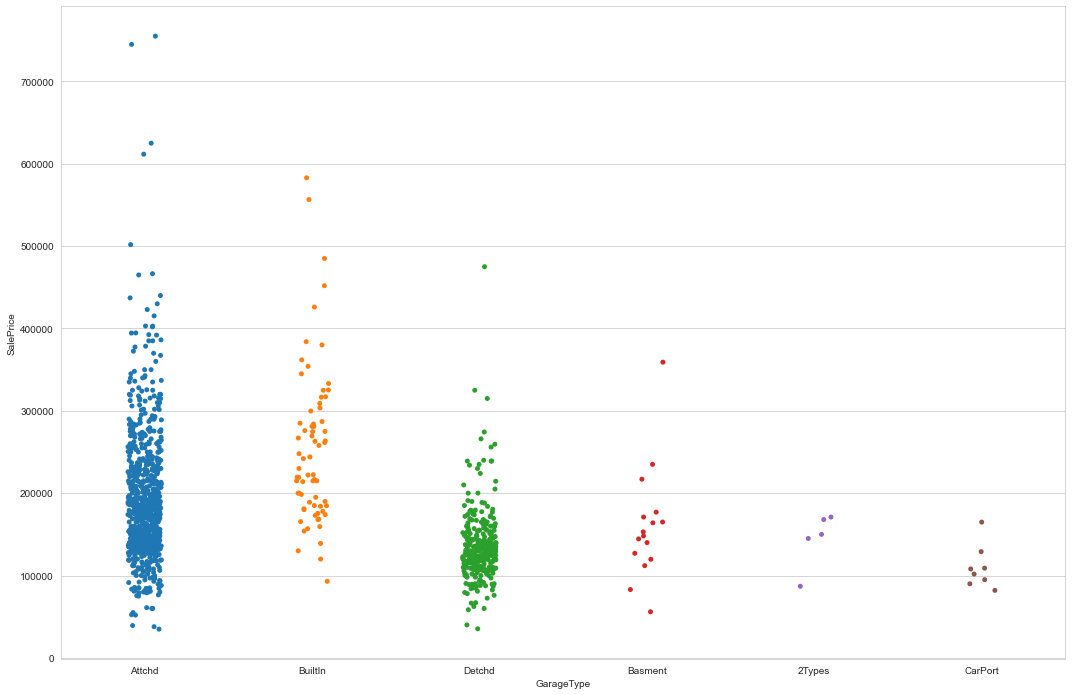

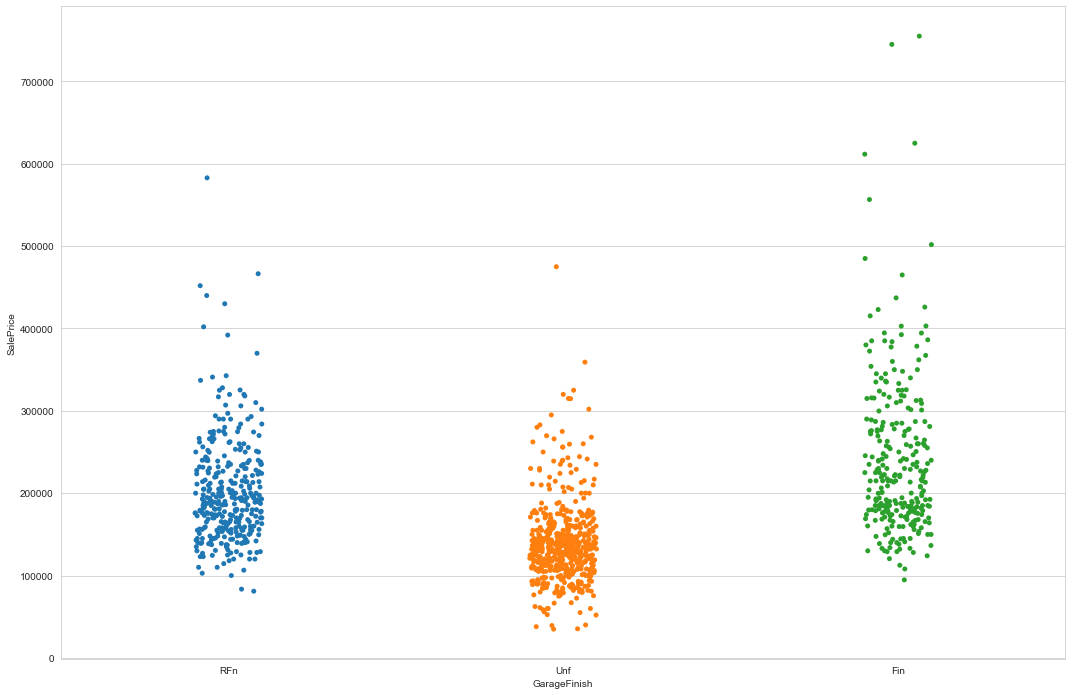

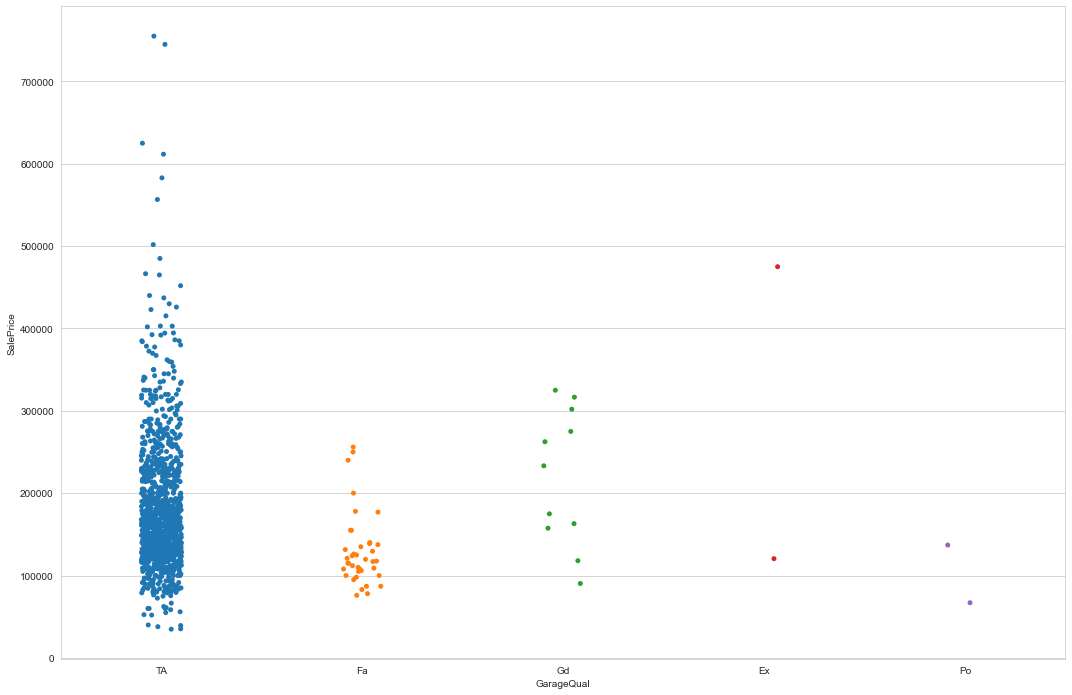

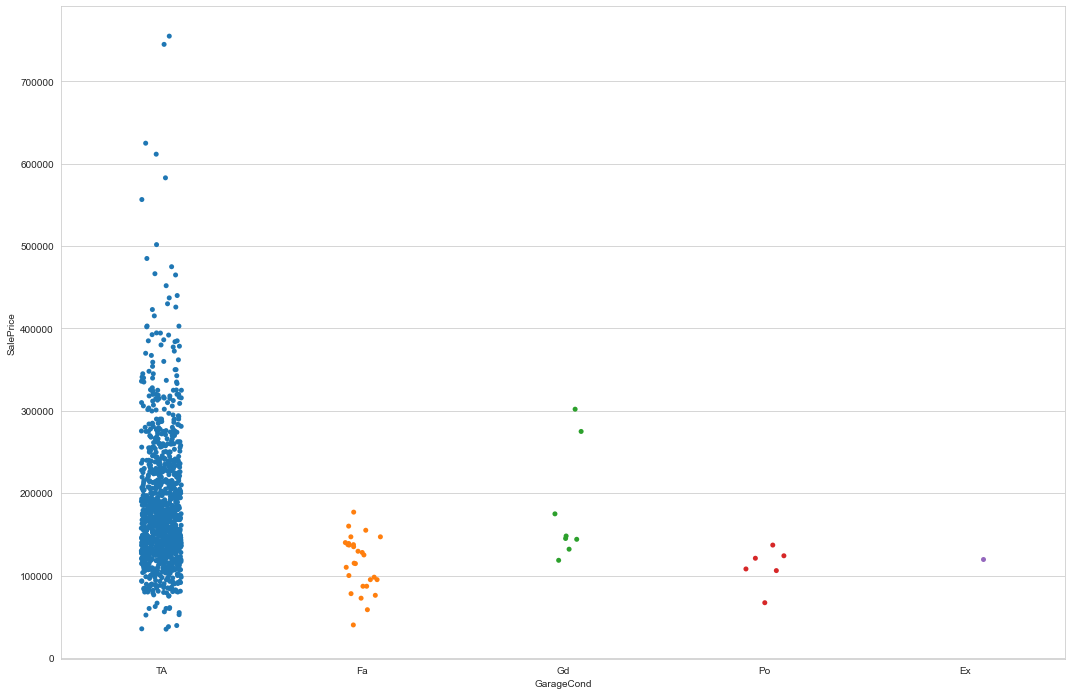

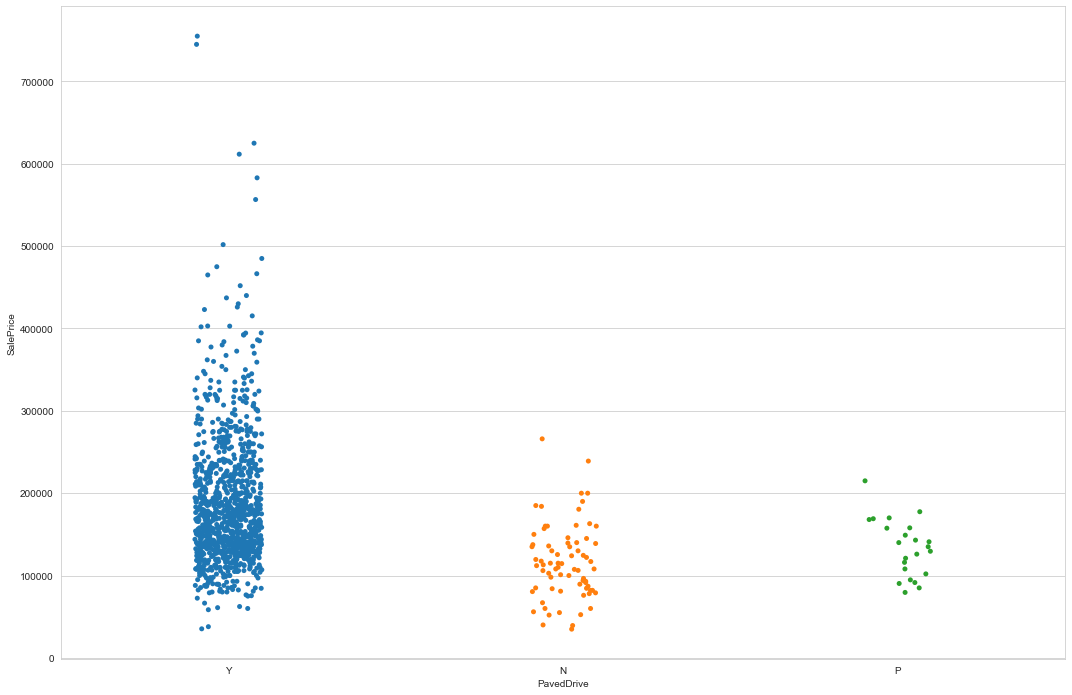

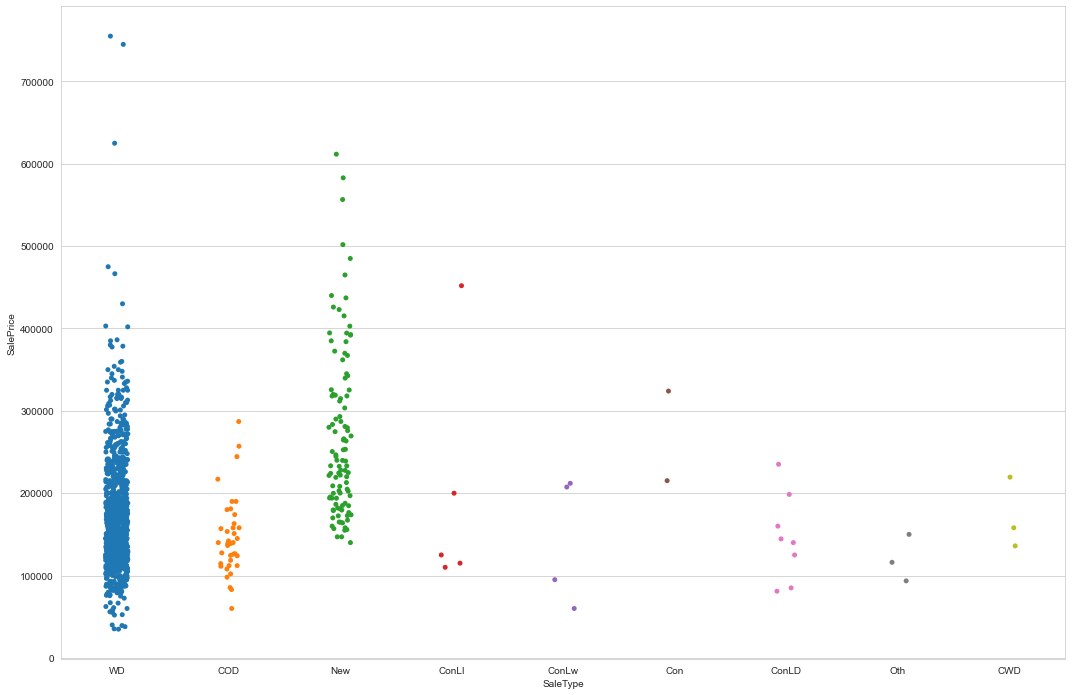

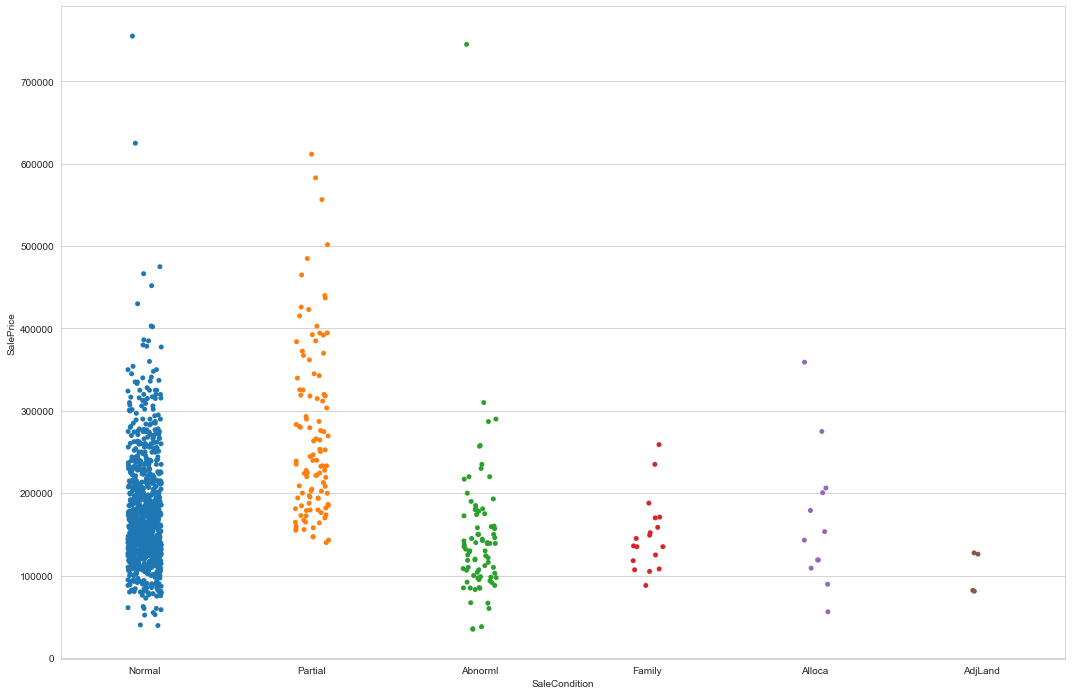

In [29]:
for i in df_str_types:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.stripplot(x=i,y='SalePrice',data=df)
    plt.show()


1. Low density residential zoning classification has the highest sale price. 2. Commercial zoing classification has the lowest sale price. 3. Medium density residential zoning classification has also high sale prices. 4. High density residential zoning classification has also low prices. 5. Pave street has higher sale prices than Gravel street. 6. Gravel alley has the highest sale price. 7. Slightly irregular lot shape property has the highest sale prices. 8. Irregulat lot shape property has the lowest sale prices. 9. Near Flat/Level land contour has the highest sale prices. 10. Banked - Quick and significant rise from street grade to building land contour has the lowest sale prices. 11. Corner lot configuration has the highest sale prices. 12. Frontage on 3 sides of property Lot configuration has the lowest sale prices. 13. Cul-de-sac and Inside lot configuration has also high prices. 14. Gental slope property has the highest sale prices. 15. Severe Slope property has the lowest sale prices. 16. Northridge Physical locations within Ames city limits has the highest sale prices. 17. BrDale Physical locations within Ames city limits has the lowest sale prices. 18. Northridge Heights, Stone Brook, Old Town, Somerset and Northridge have also high sale prices. 19. Regions which have normal proximiy to various conditions have the highest sale prices. 20. Regions adjacent to East-West Railroad have the lowest sale prices. 21. Regions adjacent to arterial street, North-South Railroad and Near positive off-site feature--park, greenbelt, etc have also high sale prices. 22. Regions which have normal proximity to various conditions ( if more than one is present ) have the highest sale prices. 23. Regions adjacent to arterial street which have proximity to various conditions ( if more than one is present ) have the lowest sale prices. 24. Regions near positive off-site feature--park, greenbelt, etc. and adjacent to postive off-site feature which have proximity to various conditions ( if more than one is present ) have also high sale prices. 25. Regions which have Single-family Detached Type of dwelling have the highest sale prices. 26. Regions which have duplex Type of dwelling have the highest sale prices. 27. Regions which have Townhouse End Unit Type of dwelling have also high sale prices. 28. Regions which have two story style of dwelling have the highest sale prices. 29. Regions which have One and one-half story: 2nd level unfinished style of dwelling have the lowest sale prices. 30. Regions which have One story and Two and one-half story: 2nd level finished style of dwelling have also high sale prices. 31. Regions which have hip type of roof have the highest sale prices. 32. Regions which have shed type of roof have the lowest sale prices. 33. Regions which have gable type of roof also have high sale prices. 34. Regions which have Wood Shingles Roof material have the highest sale prices. 35. Regions which have Roll Roof material have the lowest sale prices. 36. Regions which have Standard (Composite) Shingle, Wood Shakes and Gravel & Tar roof material have also high sale prices 37. Regions which have hardboard as exterior covering on house have the highest sale prices. 38. Regions which have common brick as exterior covering on house have the lowest sale prices. 39. Regions which have Wood Siding, Vinyl Siding and Cement Board as exterior covering on house also have high prices. 40. Regions which have Hard Board as Exterior covering on house (if more than one material) have the highest sale prices. 41. Regions which have common brick as Exterior covering on house (if more than one material) have the lowest sale prices. 42. Regions which have Imitation Stucco, Vinyl Siding and Cement Board as Exterior covering on house (if more than one material) have also high sale prices. 43. Regions which have brick face as Masonry veneer type have the highest sale prices. 44. Regions which have common brick as Masonry veneer type have the lowest sale prices. 45. Regions which have Excellent quality of the material on the exterior have the highest sale prices. 46. Regions which have Fair quality of the material on the exterior have the lowest sale prices. 47. Regions which have good quality of the material on the exterior also have high sale prices. 48. Regions which have Average/Typical present condition of the material on the exterior have the highest sale prices. 49. Regions which have poor present condition of the material on the exterior have the lowest sale prices. 50. Regions which have good present condition of the material on the exterior have high sale prices.

In [30]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64" or "float64":
        df_int_types.append(i)

In [31]:
df_int_types

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',

In [34]:
df_int_types=['MSSubClass']

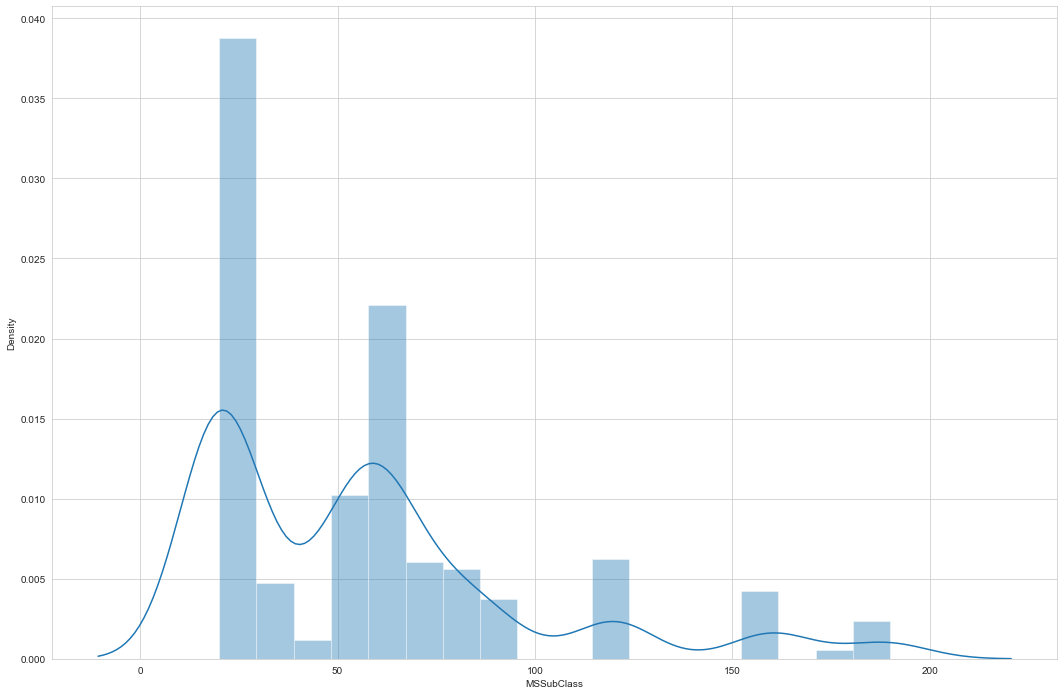

In [35]:
for i in df_int_types:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.distplot(df[i])
    plt.show()

Majorly type of dwelling are 20, 50 and 60.

# Label Encoding

In [37]:
df_object_list=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_object_list.append(i)

In [38]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_object_list:
    df[i]=LE.fit_transform(df[i])
    print(df[i].value_counts().sort_index())

0      9
1     52
2     16
3    928
4    163
Name: MSZoning, dtype: int64
0       4
1    1164
Name: Street, dtype: int64
0    390
1     32
2      6
3    740
Name: LotShape, dtype: int64
0      50
1      42
2      30
3    1046
Name: LandContour, dtype: int64
0    1168
Name: Utilities, dtype: int64
0    222
1     69
2     33
3      2
4    842
Name: LotConfig, dtype: int64
0    1105
1      51
2      12
Name: LandSlope, dtype: int64
0      15
1       2
2      11
3      50
4      24
5     118
6      45
7      83
8      64
9      30
10      9
11     34
12    182
13      8
14     59
15     35
16     61
17     86
18     21
19     60
20     51
21     68
22     19
23     24
24      9
Name: Neighborhood, dtype: int64
0      38
1      67
2    1005
3       6
4      17
5       9
6      20
7       2
8       4
Name: Condition1, dtype: int64
0       2
1       6
2    1154
3       1
4       2
5       1
6       1
7       1
Name: Condition2, dtype: int64
0    981
1     27
2     41
3     29
4     90
Name: B

# Dropping of Columns

In [39]:
# We will drop utilities column as it has only single type of value.
df.drop("Utilities", axis=1, inplace=True)

# Plotting Outliers

MSSubClass         AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
MSZoning         AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
LotFrontage      AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
LotArea          AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Street           AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
                                       ...                        
MoSold           AxesSubplot(0.619681,0.20178;0.0824468x0.0639831)
YrSold           AxesSubplot(0.718617,0.20178;0.0824468x0.0639831)
SaleType         AxesSubplot(0.817553,0.20178;0.0824468x0.0639831)
SaleCondition         AxesSubplot(0.125,0.125;0.0824468x0.0639831)
SalePrice          AxesSubplot(0.223936,0.125;0.0824468x0.0639831)
Length: 74, dtype: object

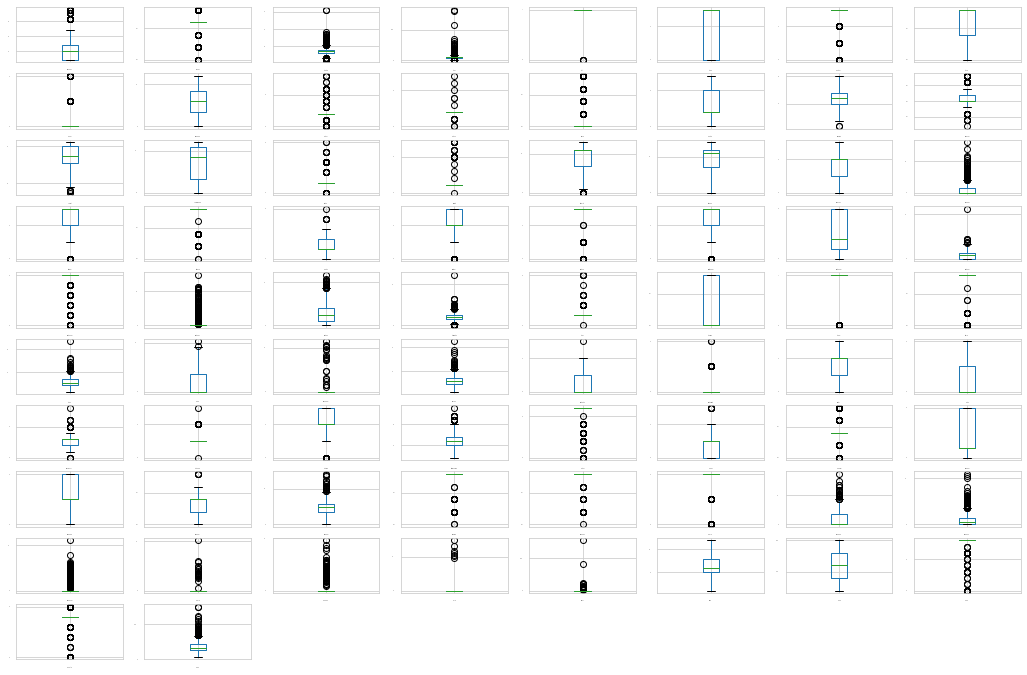

In [43]:
df.plot(kind='box',subplots=True,layout=(10,8),sharex=False,fontsize=1,figsize=(18,12))

All the variables have outliers except Id, LotShape, LotConfig ,Neighborhood, HouseStyle , YearRemodAdd, Exterior2nd, MasVnrType, BsmtExposure, BsmtFinType1, MoSold, YrSold, GarageFinish, GarageType have outliers.

# Outliers Removal

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [45]:
z

array([[1.50830058, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.87704243, 0.02164599, 1.07063136, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.07709478, 0.02164599, 0.93686671, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [2.46243779, 0.02164599, 2.09513215, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.31562908, 4.76211672, 0.93583847, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.07709478, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.02179027]])

In [46]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 8, 19, 33, ..., 38, 60, 61], dtype=int64))


In [47]:
df_new=df[(z<3).all(axis=1)]

In [48]:
df_new.shape

(482, 74)

In [49]:
df.shape

(1168, 74)

In [50]:
((1168-468)/1168)*100

59.93150684931506

In [51]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new1=df[~((df<(Q1-1.5*IQR))|(df<(Q3+1.5*IQR))).any(axis=1)]

In [52]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)

shape before and after
shape before         : (1168, 74)
shape after          : (0, 74)


In [53]:
print("Percentage Loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

Percentage Loss      : 1.0


In [54]:
df=df_new

In [55]:
df.shape

(482, 74)

# To check skewness

In [56]:
df.skew()

MSSubClass       1.250303
MSZoning         2.325272
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.588511
SalePrice        0.798563
Length: 74, dtype: float64

In [57]:
df_rs=['MSSubClass','MSZoning','BldgType','OverallCond','RoofStyle','MasVnrArea','BsmtFinSF2','BsmtUnfSF','HeatingQC','2ndFlrSF',
      'LowQualFinSF','FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [58]:
df.skew()

MSSubClass       0.693011
MSZoning         2.156852
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.319015
SalePrice        0.798563
Length: 74, dtype: float64

In [59]:
df_rs=['MSSubClass','MSZoning','BldgType','OverallCond','RoofStyle','MasVnrArea','BsmtFinSF2','2ndFlrSF',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [60]:
df.skew()

MSSubClass       0.457521
MSZoning         2.044507
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.160250
SalePrice        0.798563
Length: 74, dtype: float64

In [61]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [62]:
df_rs=['MSZoning','BldgType','OverallCond','RoofStyle','BsmtFinSF2',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [63]:
df.skew()

MSSubClass       0.457521
MSZoning         1.979640
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.074359
SalePrice        0.798563
Length: 74, dtype: float64

In [64]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [65]:
df_rs=['MSZoning','BldgType','OverallCond','RoofStyle','BsmtFinSF2',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [66]:
df.skew()

MSSubClass       0.457521
MSZoning         1.944794
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -3.192274
SaleCondition    1.029729
SalePrice        0.798563
Length: 74, dtype: float64

In [67]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [70]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','PavedDrive','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

In [71]:
df.skew()

MSSubClass       0.457521
MSZoning         1.944794
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -4.103750
SaleCondition    1.029729
SalePrice        0.798563
Length: 74, dtype: float64

In [74]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','PavedDrive','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

In [75]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','PavedDrive','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

In [76]:
df.skew()

MSSubClass       0.457521
MSZoning         1.944794
LotFrontage      0.049920
LotArea          0.198824
Street           0.000000
                   ...   
MoSold           0.268020
YrSold           0.071870
SaleType        -4.151336
SaleCondition    1.029729
SalePrice        0.798563
Length: 74, dtype: float64

In [77]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

# Dropping of Columns

 We will remove PavedDrive , LowQualFinSF, Electrical, Exterior2nd and Exterior1st columns because their skewness is very high.

In [78]:
df.drop(['PavedDrive','LowQualFinSF', 'Electrical', 'Exterior2nd', 'Exterior1st'], axis=1,inplace=True)

In [79]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold

In [82]:
x=df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y=df['SalePrice']

In [83]:
x.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0     3.309751  1.071075     70.98847     4928       1         0     1.000502   
2     2.783158  1.071075     92.00000     9920       1         0     1.000502   
5     2.783158  1.071075     58.00000    14054       1         0     1.000502   
6     2.114743  1.071075     70.98847    11341       1         0     1.000502   
11    2.783158  1.071075     44.00000     9548       1         0     1.000502   

    LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0    1.000634          0            13    1.000317           2  1.090508   
2    1.000000          0            15    1.000317           2  0.000000   
5    1.000634          0             8    1.000317           2  0.000000   
6    1.000634          0            19    1.000317           2  0.000000   
11   1.000000          0             5    1.000317           2  0.000000   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0            2            6     1.105823   1.003476      1.003476   1.000000   
2            5            7     1.105823   1.003481      1.003481   1.000000   
5            5            7     1.105823   1.003483      1.003483   1.000000   
6            2            5     1.118496   1.003472      1.003481   1.071075   
11           5            7     1.118496   1.003482      1.003482   1.000000   

    RoofMatl  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          1           2    0.000000          3   1.000634    1.000000   
2          1           2    0.000000          2   1.000634    1.000317   
5          1           2    0.000000          2   1.000634    1.000317   
6          1           1    3.662842          3   1.000634    1.000000   
11         1           1    3.864348          2   1.000634    1.000317   

    BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0   1.000317  1.000502      1.000502             0         120      1.000736   
2   1.000317  1.000502      0.000000             2         862      1.000736   
5   1.000317  1.000502      0.000000             5           0      1.000736   
6   1.000317  1.000502      1.000502             0        1302      1.000736   
11  1.000317  1.000502      1.000502             2         483      1.000736   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0          0.0  30.951575         1078        1        2.0           1   
2          0.0  15.968719         1117        1        0.0           1   
5          0.0  29.647934          879        1        0.0           1   
6          0.0   9.486833         1392        1        2.0           1   
11         0.0  21.400935          941        1        0.0           1   

    1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0        958  0.000000        958             0             0         2   
2       1127  5.455800       2013             1             0         2   
5        879  5.600783       1863             0             0         2   
6       1392  0.000000       1392             1             0         1   
11       941  5.458876       1829             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0          0             2             1     1.041528             5   
2          1             3             1     1.041528             8   
5          1             4             1     1.026004             9   
6          1             3             1     1.041528             5   
11         1             3             1     1.026004             7   

    Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0     1.068613           1     1.026004    1.000000             1           2   
2     1.068613           1     1.026004    1.000000             2           2   
5     1.068613           1     1.012919    1.071075             0           3   
6     

# Scaling of Data

In [84]:

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [85]:
x

array([[ 1.55217458, -0.29881425,  0.02906689, ..., -0.64160059,
         0.32380129, -0.25480097],
       [ 0.42400807, -0.29881425,  1.14191182, ..., -0.64160059,
         0.32380129, -0.25480097],
       [ 0.42400807, -0.29881425, -0.65884837, ..., -1.37616468,
        -1.98227364,  2.5935039 ],
       ...,
       [-1.00799588, -0.29881425,  0.02906689, ...,  1.56209169,
         0.32380129, -0.25480097],
       [ 2.08093261, -0.29881425, -2.45960856, ...,  0.8275276 ,
         0.32380129, -0.25480097],
       [ 0.42400807, -0.29881425,  0.02906689, ..., -1.37616468,
         0.32380129, -0.25480097]])

In [86]:
x=pd.DataFrame(x)

In [87]:
x

0         1         2         3    4         5         6   \
0    1.552175 -0.298814  0.029067 -1.278517  0.0 -1.224954  0.198187   
1    0.424008 -0.298814  1.141912  0.204461  0.0 -1.224954  0.198187   
2    0.424008 -0.298814 -0.658848  1.432552  0.0 -1.224954  0.198187   
3   -1.007996 -0.298814  0.029067  0.626598  0.0 -1.224954  0.198187   
4    0.424008 -0.298814 -1.400338  0.093950  0.0 -1.224954  0.198187   
..        ...       ...       ...       ...  ...       ...       ...   
477 -1.007996 -0.298814  0.029067  0.599565  0.0 -1.224954  0.198187   
478  0.424008 -0.298814  0.029067  0.454594  0.0 -1.224954  0.198187   
479 -1.007996 -0.298814  0.029067  0.174456  0.0 -1.224954  0.198187   
480  2.080933 -0.298814 -2.459609 -2.065161  0.0  0.832286  0.198187   
481  0.424008 -0.298814  0.029067 -0.407208  0.0 -1.224954  0.198187   

           7    8         9         10   11        12        13        14  \
0    0.482582  0.0  0.240769  0.121461  0.0  2.463525 -0.685482 -0.220936   
1    0.480963  0.0  0.565386  0.121461  0.0 -0.408714  0.961041  0.591973   
2    0.482582  0.0 -0.570773  0.121461  0.0 -0.408714  0.961041  0.591973   
3    0.482582  0.0  1.214619  0.121461  0.0 -0.408714 -0.685482 -1.033844   
4    0.480963  0.0 -1.057699  0.121461  0.0 -0.408714  0.961041  0.591973   
..        ...  ...       ...       ...  ...       ...       ...       ...   
477  0.482582  0.0  2.026161  0.121461  0.0 -0.408714 -0.685482 -0.220936   
478  0.480963  0.0 -0.570773  0.121461  0.0 -0.408714  0.961041  0.591973   
479  0.482582  0.0  1.214619  0.121461  0.0 -0.408714 -0.685482 -1.033844   
480  0.481772  0.0  0.240769  0.121461  0.0  2.412343  0.961041 -0.220936   
481  0.482582  0.0 -0.570773  0.121461  0.0 -0.408714  0.961041 -0.220936   

           15        16        17        18   19        20        21  \
0   -0.557821 -0.278157 -0.754178 -0.469311  0.0  0.453491 -0.945846   
1   -0.557821  0.560539  0.399663 -0.469311  0.0  0.453491 -0.945846   
2   -0.557821  0.976742  0.890458 -0.469311  0.0  0.453491 -0.945846   
3    0.643217 -1.082815  0.344994  2.130782  0.0 -1.119046  1.034089   
4    0.643217  0.852100  0.727105 -0.469311  0.0 -1.119046  1.143013   
..        ...       ...       ...       ...  ...       ...       ...   
477  0.643217 -0.236021 -0.698956 -0.469311  0.0  0.453491 -0.945846   
478 -0.557821  0.685619  0.508919 -0.469311  0.0  0.453491  1.382098   
479 -0.557821 -0.658342 -1.252439 -0.469311  0.0 -1.119046  0.329633   
480  0.643217 -0.278157 -0.754178 -0.469311  0.0  0.453491 -0.945846   
481 -0.557821  0.810510  0.727105 -0.469311  0.0  0.453491 -0.945846   

           22        23        24        25        26        27        28  \
0    0.939649  0.292550  0.171803  0.275217  0.208063  0.534300 -1.451048   
1   -1.046802  0.292550  0.173691  0.275217  0.208063 -1.872077 -0.347885   
2   -1.046802  0.292550  0.173691  0.275217  0.208063 -1.872077  1.306859   
3    0.939649  0.292550  0.171803  0.275217  0.208063  0.534300 -1.451048   
4   -1.046802  0.292550  0.173691  0.275217  0.208063  0.534300 -0.347885   
..        ...       ...       ...       ...       ...       ...       ...   
477 -1.046802  0.292550  0.171803  0.275217  0.208063  0.534300 -1.451048   
478 -1.046802  0.292550  0.173691  0.275217  0.208063  0.534300 -0.347885   
479  0.939649 -3.418217  0.171803  0.275941  0.208063  0.534300 -0.899467   
480  0.939649  0.292550  0.171803  0.275217  0.208063  0.534300 -1.451048   
481 -1.046802  0.292550  0.173691  0.275217  0.208063  0.534300 -0.347885   

           29        30        31        32        33   34        35   36  \
0   -0.832539  0.220003 -0.238618  0.866288  0.023754  0.0  1.424665  0.0   
1    0.975507  0.220003 -0.238618 -0.608876  0.139553  0.0 -0.820916  0.0   
2   -1.124945  0.220003 -0.238618  0.737936 -0.567119  0.0 -0.820916  0.0   
3    2.047663  0.220003 -0.238618 -1.247062  0.956085  0.0  1.424665  0.0   
4    0.051990  0.220003 -0.238618 -0.074037 -0

In [88]:
x.columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [89]:
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    1.552175 -0.298814     0.029067 -1.278517     0.0 -1.224954     0.198187   
1    0.424008 -0.298814     1.141912  0.204461     0.0 -1.224954     0.198187   
2    0.424008 -0.298814    -0.658848  1.432552     0.0 -1.224954     0.198187   
3   -1.007996 -0.298814     0.029067  0.626598     0.0 -1.224954     0.198187   
4    0.424008 -0.298814    -1.400338  0.093950     0.0 -1.224954     0.198187   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0   0.482582        0.0      0.240769    0.121461         0.0  2.463525   
1   0.480963        0.0      0.565386    0.121461         0.0 -0.408714   
2   0.482582        0.0     -0.570773    0.121461         0.0 -0.408714   
3   0.482582        0.0      1.214619    0.121461         0.0 -0.408714   
4   0.480963        0.0     -1.057699    0.121461         0.0 -0.408714   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0   -0.685482    -0.220936    -0.557821  -0.278157     -0.754178  -0.469311   
1    0.961041     0.591973    -0.557821   0.560539      0.399663  -0.469311   
2    0.961041     0.591973    -0.557821   0.976742      0.890458  -0.469311   
3   -0.685482    -1.033844     0.643217  -1.082815      0.344994   2.130782   
4    0.961041     0.591973     0.643217   0.852100      0.727105  -0.469311   

   RoofMatl  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0       0.0    0.453491   -0.945846   0.939649    0.29255    0.171803   
1       0.0    0.453491   -0.945846  -1.046802    0.29255    0.173691   
2       0.0    0.453491   -0.945846  -1.046802    0.29255    0.173691   
3       0.0   -1.119046    1.034089   0.939649    0.29255    0.171803   
4       0.0   -1.119046    1.143013  -1.046802    0.29255    0.173691   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0  0.275217  0.208063      0.534300     -1.451048   -0.832539      0.220003   
1  0.275217  0.208063     -1.872077     -0.347885    0.975507      0.220003   
2  0.275217  0.208063     -1.872077      1.306859   -1.124945      0.220003   
3  0.275217  0.208063      0.534300     -1.451048    2.047663      0.220003   
4  0.275217  0.208063      0.534300     -0.347885    0.051990      0.220003   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0   -0.238618   0.866288     0.023754      0.0   1.424665         0.0   
1   -0.238618  -0.608876     0.139553      0.0  -0.820916         0.0   
2   -0.238618   0.737936    -0.567119      0.0  -0.820916         0.0   
3   -0.238618  -1.247062     0.956085      0.0   1.424665         0.0   
4   -0.238618  -0.074037    -0.383028      0.0  -0.820916         0.0   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0 -0.556371 -0.789501  -1.156099     -0.901127           0.0  0.746629   
1 -0.028076  1.302317   1.281996      1.109721           0.0  0.746629   
2 -0.803326  1.357905   0.935347     -0.901127           0.0  0.746629   
3  0.800317 -0.789501  -0.153129      1.109721           0.0 -1.230708   
4 -0.609513  1.303496   0.856773      1.109721           0.0  0.746629   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.806650     -1.208184           0.0     0.267983     -1.007049   
1  1.239694      0.258679           0.0     0.267983      1.206010   
2  1.239694      1.725542           0.0     0.198917      1.943696   
3  1.239694      0.258679           0.0     0.267983     -1.007049   
4  1.239694      0.258679           0.0     0.198917      0.468324   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0    0.142226    0.648614     0.201342   -0.578961     -0.060697    0.180782   
1    0.142226    0.648614     0.201342   -0.578961      1.211301    0.180782   
2    0.142226    0.648614     0.085343    1.125592     -1.332695    1.633064   
3   -4.457643    0.648614     0.085343    1.958918 

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.9311048994726617
error:
Mean absolute error: 11653.521589027167
Mean squared error: 240680123.90649995
Root Mean squared error: 15513.86876012879
0.8753565057087325
error:
Mean absolute error: 13352.755189974989
Mean squared error: 395176195.88159424
Root Mean squared error: 19879.0391086087
0.8564340411827048
error:
Mean absolute error: 15203.641835943936
Mean squared error: 546493457.2299411
Root Mean squared error: 23377.199516407887
0.904285140158543
error:
Mean absolute error: 14674.409320043645
Mean squared error: 357815397.26417845
Root Mean squared error: 18916.009020514302
0.8914394061396023
error:
Mean absolute error: 13387.147149689674
Mean squared error: 326093659.0611248
Root Mean squared error: 18058.063546823752
0.9077457015981746
error:
Mean absolute error: 11977.597167488218
Mean squared error: 261402370.09906548
Root Mean squared error: 16167.942667484489
0.8671928298781602
error:
Mean absolute error: 15558.898520509305
Mean squared error: 414812488.69905245
Root Me

# Algorithms

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9034922846031997
error:
Mean absolute error: 13358.82900271764
Mean squared error: 290852872.47987777
Root Mean squared error: 17054.409180029597


In [94]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

0.803290115069347
error:
Mean absolute error: 17419.22429906542
Mean squared error: 592840011.2056075
Root Mean squared error: 24348.306126004074


In [95]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

0.8539298343933475
error:
Mean absolute error: 16353.471028037384
Mean squared error: 440223116.62467295
Root Mean squared error: 20981.49462323104


In [96]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))

0.00034562135090809853
error:
Mean absolute error: 43408.49891254562
Mean squared error: 3012736819.2451863
Root Mean squared error: 54888.40332206054


In [97]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.8882050863700639
error:
Mean absolute error: 13378.211869158878
Mean squared error: 336925101.0058083
Root Mean squared error: 18355.51963322772


# Linear Regression is the best algorithm.

# Cross Validation Score

In [98]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.89114922 0.90818019 0.84615238 0.93833976 0.84187095]
0.8851384978675967 0.03684947959341146


In [99]:
list1=[0.9359912426997713]
list2=[0.8845803160883987]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.05141092661137259]


As the difference between accuracy scores and cross validation scores of Linear Regression is 0.05%. So, It is verified that Linear Regression is the best algorithm for this model with accuracy of 93.543%.

# Hyper Parameter Tuning

In [100]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [101]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
mean_squared_error_ls=mean_squared_error(y_test,pred)
print('Mean squared error:',mean_squared_error_ls)
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9084799114336338
error:
Mean absolute error: 13080.134736646372
Mean squared error: 275821270.2445029
Mean squared error: 275821270.2445029
Root Mean squared error: 16607.86772118874


In [102]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
predrd=rd.predict(x_test)
r2score=r2_score(y_test,predrd)
print(r2_score(y_test,predrd))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
mean_squared_error_rd=mean_squared_error(y_test,predrd)
print('Mean squared error:',mean_squared_error_rd)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrd)))

0.9095941796022381
error:
Mean absolute error: 12989.307350706571
Mean squared error: 272463112.85554254
Root Mean squared error: 16506.456702016414


In [103]:
el=ElasticNet()
el.fit(x_train,y_train)
el.score(x_train,y_train)
predel=el.predict(x_test)
r2score=r2_score(y_test,predel)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predel))
mean_squared_error_el=mean_squared_error(y_test,predel)
print('Mean squared error:',mean_squared_error_el)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predel)))

0.9084799114336338
error:
Mean absolute error: 12874.963399981589
Mean squared error: 279264868.0713507
Root Mean squared error: 16711.21982595378


# Ridge Regression is giving the best accuracy.

# Cleaning of Test Dataset

In [104]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [105]:
df_1=pd.read_csv('test.csv')
df_1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [106]:
df_1.shape

(292, 80)

In [107]:
df_1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [108]:
df_1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [109]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Summary Statistics

In [110]:
df_1.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count   292.000000   292.000000    292.000000   291.000000   292.000000   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521   
std       1.063267    30.447016     20.105792   175.030021   429.559675   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean     46.157534   557.315068  1042.767123  1133.691781   339.657534   
std     152.467119   411.043768   424.561153   366.941919   424.278825   
min       0.000000     0.000000     0.000000   372.000000     0.000000   
25%       0.000000   255.000000   771.750000   858.000000     0.000000   
50%       0.000000   487.000000   971.000000  1047.500000     0.000000   
75%       0.000000   780.000000  1322.000000  1370.500000   717.000000   
max    1085.000000  1935.000000  3094.000000  2402.000000  1589.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    292.000000   292.000000    292.000000    292.000000  292.000000   
mean       3.702055  1477.051370      0.424658      0.065068    1.575342   
std       38.219527   514.199429      0.508831      0.247070    0.547856   
min        0.000000   520.000000      0.000000      0.000000    0.000000   
25%        0.000000  1061.500000      0.000000      0.000000    1.000000   
50%        0.000000  1440.000000      0.000000      0.000000    2.000000   
75%        0.000000  1720.250000      1.000000      0.000000    2.000000   
max      479.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   275.000000  292.000000   292.000000  292.000000   292.000000   
mean   1979.760000    1.729452   457.458904   86.397260    47.061644   
std      23.868875    0.754430   210.785591  121.898836    65.865449   
min    1916.000000    0.000000     0.000000    0.000000     0.000000   
25%    1964.000000    1.000000   300.000000    0.000000     0.000000   
50%    1979.000000    2.000000   467.500000    0.000000    28.500000   
75%    2003.000000    2.000000   569.750000  149.250000    66.000000   
max    2010.000000    4.000000  1052.000000  728.000000   41

Mean is more than median for SalePrice, MoSold, MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, OpenPorchSF, WoodDeckSF, BsmtFinSF1, MasVnrArea, YearRemodAdd, OverallCond, OverallQual, LotArea, LotFrontage, MSSubClass and Id Column.

There is large difference between 75% and maximum for Price column.

# To check missing values

In [111]:
pd.set_option('display.max_rows',100)
df_1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<AxesSubplot:>

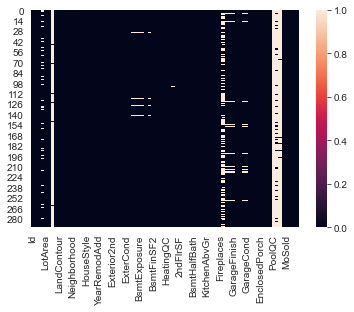

In [112]:
sns.heatmap(df_1.isnull())

LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature have null values.

In [113]:
df_1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [114]:
df_1_object_list=[]
for i in df_1.columns:
    if df_1[i].dtypes == "object":
        df_1_object_list.append(i)

In [115]:
for i in df_1_object_list:
    df_1[i]=df_1[i].fillna(df_1[i].mode()[0])

In [116]:

df_1_int_types=[]
for i in df_1.columns:
    if df_1[i].dtypes == "int64":
        df_1_int_types.append(i)

In [117]:
for i in df_1_int_types:
    df_1[i]=df_1[i].fillna(df_1[i].mean())

In [118]:
df_1_float_types=[]
for i in df_1.columns:
    if df_1[i].dtypes == "float64":
        df_1_float_types.append(i)

In [119]:
df_1_float_types

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [120]:
for i in df_1_float_types:
    df_1[i]=df_1[i].fillna(df_1[i].mean())


In [121]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

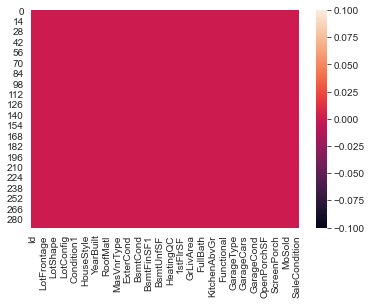

In [122]:
sns.heatmap(df_1.isnull())

In [123]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_1_object_list:
    df_1[i]=LE.fit_transform(df_1[i])
    print(df_1[i].value_counts().sort_index())

0      1
1     13
2    223
3     55
Name: MSZoning, dtype: int64
0      2
1    290
Name: Street, dtype: int64
0     94
1      9
2      4
3    185
Name: LotShape, dtype: int64
0     13
1      8
2      6
3    265
Name: LandContour, dtype: int64
0    291
1      1
Name: Utilities, dtype: int64
0     41
1     25
2     14
3      2
4    210
Name: LotConfig, dtype: int64
0    277
1     14
2      1
Name: LandSlope, dtype: int64
0      2
1      5
2      8
3      4
4     32
5      6
6     17
7     15
8      7
9      8
10    15
11    43
12     1
13    14
14     6
15    16
16    27
17     4
18    14
19     8
20    18
21     6
22    14
23     2
Name: Neighborhood, dtype: int64
0     10
1     14
2    255
3      2
4      2
5      2
6      6
7      1
Name: Condition1, dtype: int64
0    291
1      1
Name: Condition2, dtype: int64
0    239
1      4
2     11
3     14
4     24
Name: BldgType, dtype: int64
0     33
1      2
2    148
3      1
4      1
5     84
6      5
7     18
Name: HouseStyle, dtype: int64

In [124]:
df_1["Utilities"].value_counts()

0    291
1      1
Name: Utilities, dtype: int64

# Plotting Outliers

In [125]:
df_1.shape

(292, 76)

Id                   AxesSubplot(0.125,0.86337;0.352273x0.01663)
MSSubClass        AxesSubplot(0.547727,0.86337;0.352273x0.01663)
MSZoning            AxesSubplot(0.125,0.843414;0.352273x0.01663)
LotFrontage      AxesSubplot(0.547727,0.843414;0.352273x0.01663)
LotArea             AxesSubplot(0.125,0.823458;0.352273x0.01663)
Street           AxesSubplot(0.547727,0.823458;0.352273x0.01663)
LotShape            AxesSubplot(0.125,0.803502;0.352273x0.01663)
LandContour      AxesSubplot(0.547727,0.803502;0.352273x0.01663)
Utilities           AxesSubplot(0.125,0.783546;0.352273x0.01663)
LotConfig        AxesSubplot(0.547727,0.783546;0.352273x0.01663)
LandSlope            AxesSubplot(0.125,0.76359;0.352273x0.01663)
Neighborhood      AxesSubplot(0.547727,0.76359;0.352273x0.01663)
Condition1          AxesSubplot(0.125,0.743634;0.352273x0.01663)
Condition2       AxesSubplot(0.547727,0.743634;0.352273x0.01663)
BldgType            AxesSubplot(0.125,0.723678;0.352273x0.01663)
HouseStyle       AxesSubp

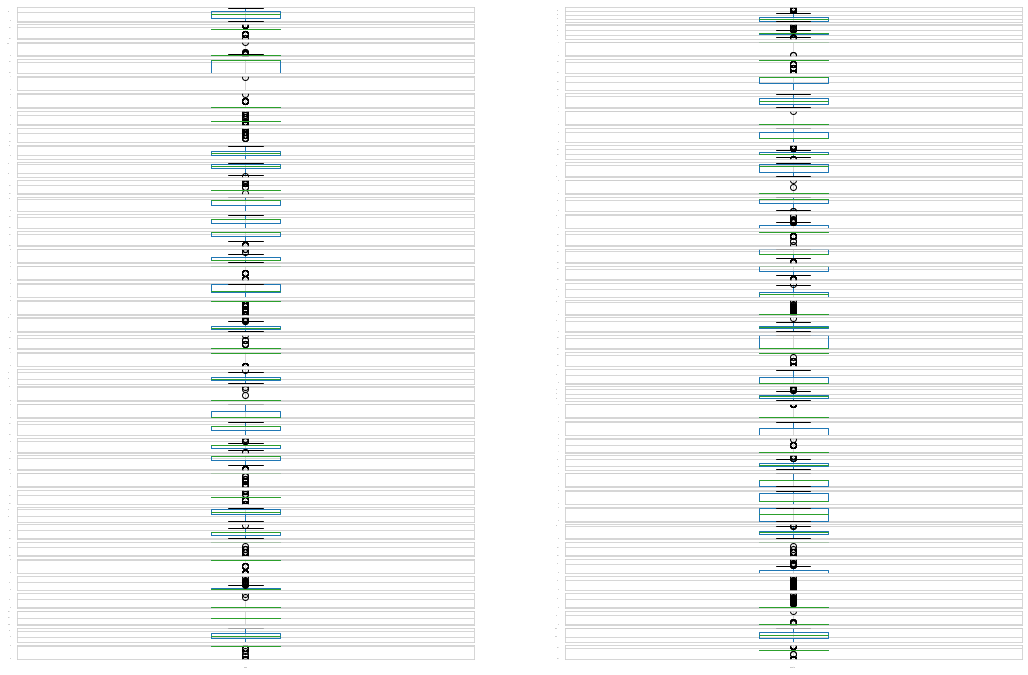

In [126]:
df_1.plot(kind='box',subplots=True,layout=(38,2),sharex=False,fontsize=1,figsize=(18,12))

All the variables have outliers except Id, LotShape, LotConfig ,Neighborhood, HouseStyle , YearRemodAdd,

In [127]:
from scipy.stats import zscore
z=np.abs(zscore(df_1))

In [128]:
z

array([[0.94827766, 0.85605433, 0.28700579, ..., 0.65090813, 0.23029007,
        0.14865423],
       [0.59312021, 1.43198105, 0.28700579, ..., 0.86355541, 6.49418003,
        3.32390858],
       [0.39167468, 0.85605433, 0.28700579, ..., 0.86355541, 0.23029007,
        0.14865423],
       ...,
       [1.67257621, 0.85605433, 0.28700579, ..., 1.62078718, 0.23029007,
        0.14865423],
       [0.52727912, 0.16964372, 1.80813647, ..., 1.4081399 , 0.23029007,
        0.14865423],
       [1.41021953, 2.3471952 , 1.80813647, ..., 1.4081399 , 0.23029007,
        0.14865423]])

In [129]:

threshold=3
print(np.where(z>3))


(array([  1,   1,   3,   8,   8,   8,   9,  10,  10,  10,  11,  12,  12,
        12,  13,  13,  13,  13,  14,  15,  19,  20,  20,  23,  23,  23,
        23,  23,  23,  24,  24,  24,  29,  29,  29,  30,  30,  32,  33,
        33,  34,  34,  34,  36,  38,  40,  45,  45,  46,  46,  47,  47,
        47,  49,  50,  51,  52,  53,  53,  54,  55,  55,  55,  58,  58,
        58,  58,  58,  58,  66,  69,  71,  71,  71,  71,  71,  71,  72,
        72,  72,  73,  73,  73,  74,  79,  81,  81,  81,  82,  82,  83,
        83,  85,  85,  85,  86,  86,  87,  88,  91,  92,  92,  92, 102,
       102, 105, 105, 105, 106, 106, 107, 107, 107, 109, 109, 109, 112,
       113, 113, 114, 115, 115, 115, 116, 117, 118, 119, 122, 123, 123,
       124, 124, 127, 127, 127, 127, 128, 128, 128, 128, 128, 129, 129,
       129, 130, 130, 133, 134, 134, 134, 139, 140, 140, 140, 141, 141,
       141, 141, 141, 141, 141, 142, 142, 143, 143, 144, 146, 146, 146,
       146, 146, 147, 148, 151, 154, 154, 154, 155, 157, 157, 1

In [130]:
df_1_new=df_1[(z<3).all(axis=1)]

In [131]:
df_1_new.shape

(0, 76)

In [132]:

df_1.shape

(292, 76)

In [133]:
((1168-468)/1168)*100

59.93150684931506

In [134]:
Q1=df_1.quantile(0.25)
Q3=df_1.quantile(0.75)
IQR=Q3-Q1
df_1_new1=df_1[~((df_1<(Q1-1.5*IQR))|(df_1<(Q3+1.5*IQR))).any(axis=1)]

In [135]:
print("shape before and after")
print("shape before".ljust(20),":",df_1.shape)
print("shape after".ljust(20),":",df_1_new1.shape)

shape before and after
shape before         : (292, 76)
shape after          : (0, 76)


In [136]:
print("Percentage Loss".ljust(20),":",(df_1.shape[0]-df_1_new1.shape[0])/df_1.shape[0])

Percentage Loss      : 1.0


In [137]:
df_1.shape

(292, 76)

In [138]:
df_1.skew()

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.976804
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1        0.739790
BsmtFinType2     -3.702330
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
T

In [139]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [140]:

df_1.skew()

Id               -0.108806
MSSubClass        0.783807
MSZoning          0.187174
LotFrontage       0.466813
LotArea           5.201616
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.173753
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.785749
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.870844
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.145759
RoofMatl         12.535240
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.876657
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.921229
BsmtUnfSF        -0.305887
T

In [141]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [142]:

df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           1.946481
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.102861
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.699812
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.679069
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.156092
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.673829
BsmtUnfSF        -0.305887
T

In [143]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [144]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [145]:

df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [146]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [147]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])

In [148]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.730099
LandContour      -4.068597
Utilities        17.088007
LotConfig        -1.742500
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -4.678408
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.775310
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -2.264538
Exterior2nd      -2.404380
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -4.419063
ExterCond        -9.115418
Foundation        0.380626
BsmtQual         -2.529539
BsmtCond         -6.245798
BsmtExposure     -1.835479
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -5.666701
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [149]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [150]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])

In [151]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.760571
LandContour      -4.378163
Utilities        17.088007
LotConfig        -2.022062
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -5.097990
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.782070
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -9.483070
Exterior2nd      -8.032821
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -5.309694
ExterCond       -15.367324
Foundation        0.380626
BsmtQual         -2.789816
BsmtCond         -6.712071
BsmtExposure     -2.042390
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -8.647048
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [152]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [153]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])

In [154]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.765550
LandContour      -4.431894
Utilities        17.088007
LotConfig        -2.073348
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -5.143036
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.784331
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st     -15.699839
Exterior2nd     -11.376171
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -5.439971
ExterCond       -16.866814
Foundation        0.380626
BsmtQual         -2.823783
BsmtCond         -6.784245
BsmtExposure     -2.076073
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -9.603529
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

# Scaling of Data

In [155]:

df_1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [156]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_1=sc.fit_transform(df_1)

In [157]:
df_1=pd.DataFrame(df_1)

In [158]:
df_1.shape

(292, 76)

In [159]:
df.shape

(482, 69)

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9034922846031997
error:
Mean absolute error: 13358.82900271764
Mean squared error: 290852872.47987777
Root Mean squared error: 17054.409180029597


# Saving the model

In [161]:
import joblib
joblib.dump(lm,"lm_house_pricing.obj")

['lm_house_pricing.obj']

# Making Predictions

In [162]:
a=joblib.load("lm_house_pricing.obj")

In [163]:
pred

array([ 88090.06104988, 179973.30292615,  74342.32165733, 203734.03027747,
       182226.39759821, 140182.07794762, 155082.4555835 , 140809.08188294,
       142230.86454652,  69527.8984988 , 123833.5246216 , 114641.17433163,
       202513.5415353 , 203943.07899191, 195238.87035438, 136986.79325301,
       152020.16756026, 159997.77155103, 216063.49948444, 232698.34319843,
       135629.18824309, 152990.66550513, 138431.75624926, 164396.47563013,
       154942.56476758, 194039.15055463, 177762.40087559, 181060.52192068,
       203216.68631159, 190094.25315796, 190142.09896085,  89795.55639291,
       161250.1911551 , 232272.10862755, 278926.28682203, 151098.43940167,
       166348.56907557, 123964.22766778, 108299.03490223, 127882.9030026 ,
       204627.36466633, 104596.40486447, 145892.3624209 , 134157.4668287 ,
       253594.62564009, 220045.1222696 , 197528.53762315, 183577.55253342,
       136487.88937155, 116625.63238489, 240936.78468571, 191023.56900676,
       136270.15617598, 1